In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
data = pd.read_csv('data_v3.csv',encoding="ISO-8859-1")
data.head(5)

,Publication Type,Coauthor,First Author,Title,Language,Document Type,Author Keywords,Author Country,Cited References,Cited Reference Count,...,Publisher,Publisher City,Publication Date,Year Published,Page Count,Areas Impact,Keywords Impact,Career Length,Author Rank,Publisher Rank
0,J,"Usta, M","Aksoy, ME",Science and the future of psychiatry,English,Editorial Material,Morphometry; Radius; Articular surface; Radio...,USA,"Akintewe OO, 2015, ACTA BIOMATER, V11, P96, D...",0,...,AMER MEDICAL ASSOC,CHICAGO,DEC,2000,2,0.293614,0.007494,6,0.000058,0.000046
1,J,"Ucisik, AH","Aksoy, ME",Science and the future of psychiatry,English,Editorial Material,Morphometry; Radius; Articular surface; Radio...,USA,"Akintewe OO, 2015, ACTA BIOMATER, V11, P96, D...",0,...,AMER MEDICAL ASSOC,CHICAGO,DEC,2000,2,0.293614,0.007494,9,0.000072,0.000046
2,J,"Maini, PK","Alber, M",Engineering analysis of diamond-like carbon c...,English,Article; Proceedings Paper,Mechanical stimulus; hair cell; primary neuro...,Japan,"Alao AR, 2017, J MECH BEHAV BIOMED, V65, P102...",10,...,BLACKWELL SCIENCE INC,MALDEN,AUG,2000,4,0.339677,0.081864,9,0.000072,0.000048
3,J,"Niebur, G","Alber, M",Engineering analysis of diamond-like carbon c...,English,Article; Proceedings Paper,Mechanical stimulus; hair cell; primary neuro...,Japan,"Alao AR, 2017, J MECH BEHAV BIOMED, V65, P102...",10,...,BLACKWELL SCIENCE INC,MALDEN,AUG,2000,4,0.339677,0.081864,3,0.000045,0.000048
4,J,"Hoefer, T","Alberghina, L",Improved blood compatibility of DLC coated po...,English,Article,biodegradable; biomaterials; Monte Carlo simu...,Australia,"Al-Amleh B, 2010, J ORAL REHABIL, V37, P641, ...",20,...,LIPPINCOTT WILLIAMS & WILKINS,PHILADELPHIA,APR,2000,4,0.556909,0.007746,0,0.000045,0.000045


In [2]:
data.describe()

,Cited Reference Count,CR count,WOS Cited count,UC 180,UC since 2013,Year Published,Page Count,Areas Impact,Keywords Impact,Career Length,Author Rank,Publisher Rank
count,353496.000000,353496.000000,353496.000000,353496.000000,353496.000000,353496.000000,353496.000000,353496.000000,339983.000000,353496.000000,353496.000000,353496.000000
mean,42.534906,26.252430,25.473349,2.895436,39.201255,2011.982181,9.066343,0.336760,0.042096,8.912522,0.000015,0.000015
std,47.090834,93.082376,90.881216,8.683157,86.376225,4.265542,6.118522,0.171244,0.039787,8.619326,0.000012,0.000008
min,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,0.000005,0.000006,0.000000,0.000006,0.000009
25%,20.000000,2.000000,2.000000,0.000000,5.000000,2009.000000,6.000000,0.208770,0.001219,0.000000,0.000008,0.000010
50%,34.000000,9.000000,9.000000,1.000000,17.000000,2013.000000,8.000000,0.356722,0.075669,7.000000,0.000011,0.000012
75%,50.000000,25.000000,24.000000,3.000000,42.000000,2015.000000,11.000000,0.452875,0.081293,16.000000,0.000017,0.000016
max,2163.000000,9254.000000,9117.000000,383.000000,4141.000000,2017.000000,245.000000,0.777660,0.104113,31.000000,0.000158,0.000068


In [3]:
data = data[data['Coauthor'].str.len()<20]

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346772 entries, 0 to 353495
Data columns (total 26 columns):
Publication Type         346772 non-null object
Coauthor                 346772 non-null object
First Author             346772 non-null object
Title                    346772 non-null object
Language                 346772 non-null int32
Document Type            346772 non-null int32
Author Keywords          279160 non-null object
Author Country           346772 non-null int32
Cited References         346772 non-null object
Cited Reference Count    346772 non-null int64
CR count                 346772 non-null int64
WOS Cited count          346772 non-null int64
WOS Categories           346772 non-null object
Research Areas           346772 non-null object
UC 180                   346772 non-null int64
UC since 2013            346772 non-null int64
Publisher                346772 non-null object
Publisher City           346772 non-null object
Publication Date         307541 n

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Language'] = le.fit_transform(data['Language'])
data['Document Type'] = le.fit_transform(data['Document Type'])
data['Author Country'] = le.fit_transform(data['Author Country'])

count    346772.000000
mean          0.336676
std           0.171212
min           0.000005
25%           0.208647
50%           0.356722
75%           0.452798
max           0.777660
Name: Areas Impact, dtype: float64


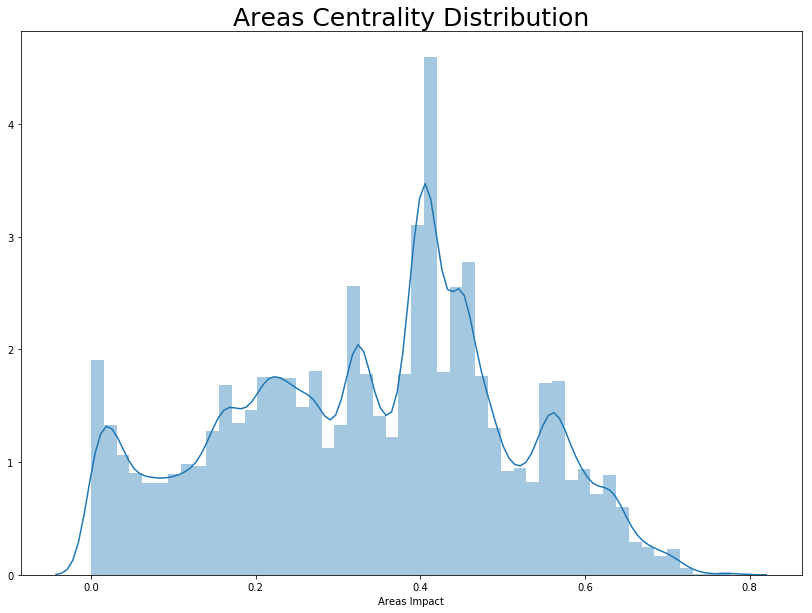

In [96]:
Areas_Impact_all = data['Areas Impact']
Areas_Impact_all.replace(np.nan, 0, inplace=True)
Areas_Impact_all.replace(np.inf, 0, inplace=True)
print(Areas_Impact_all.describe())
f, ax= plt.subplots(figsize = (14, 10))
sns.distplot(Areas_Impact_all,ax = ax)
ax.set_title('Areas Centrality Distribution',fontsize=25)
plt.savefig("Areas Centrality.png")

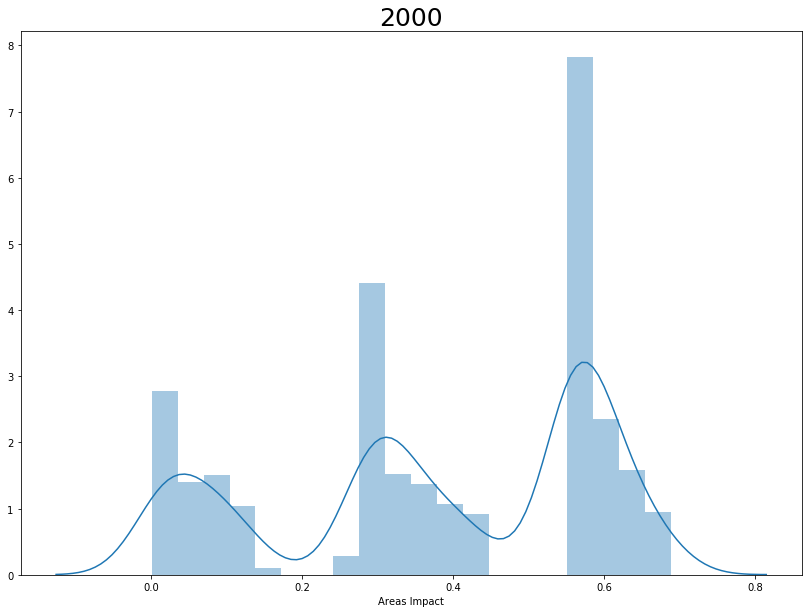

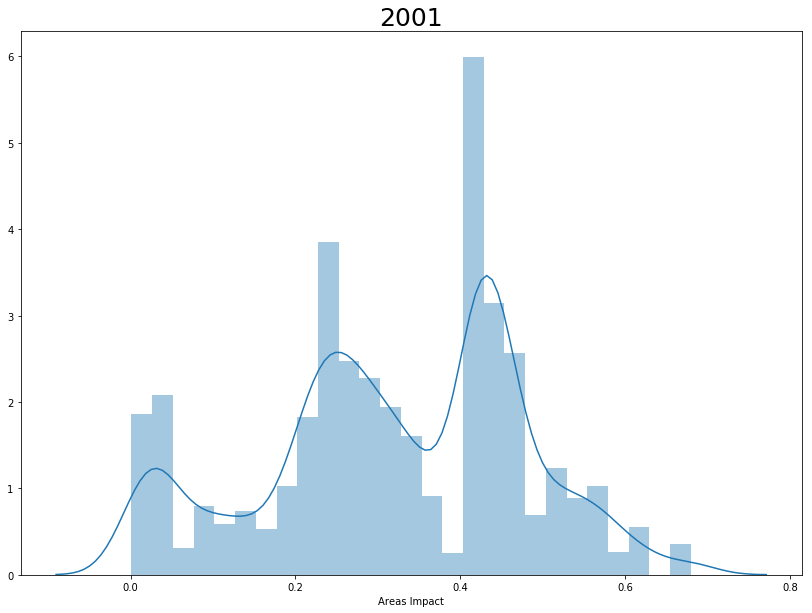

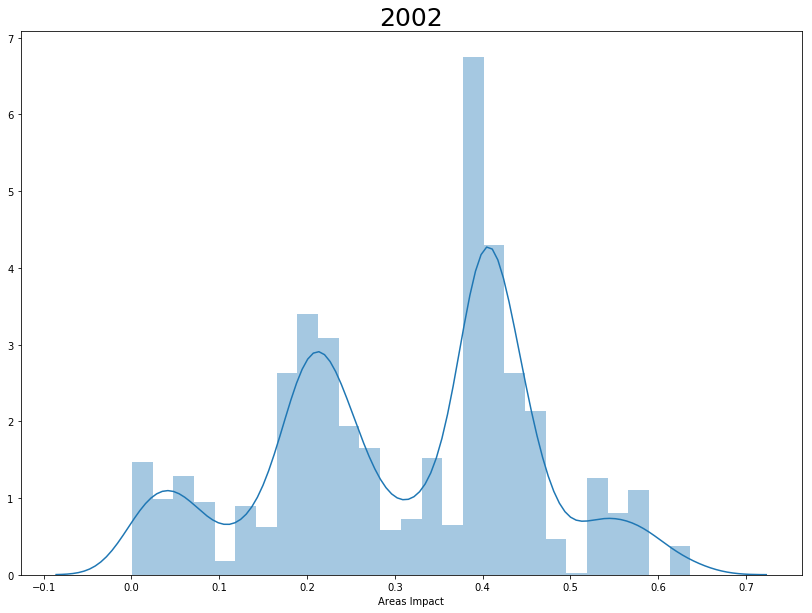

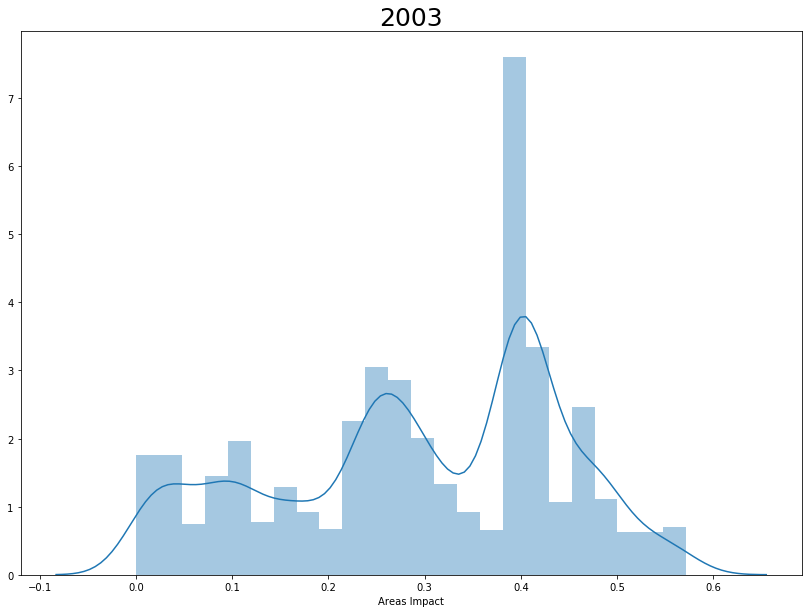

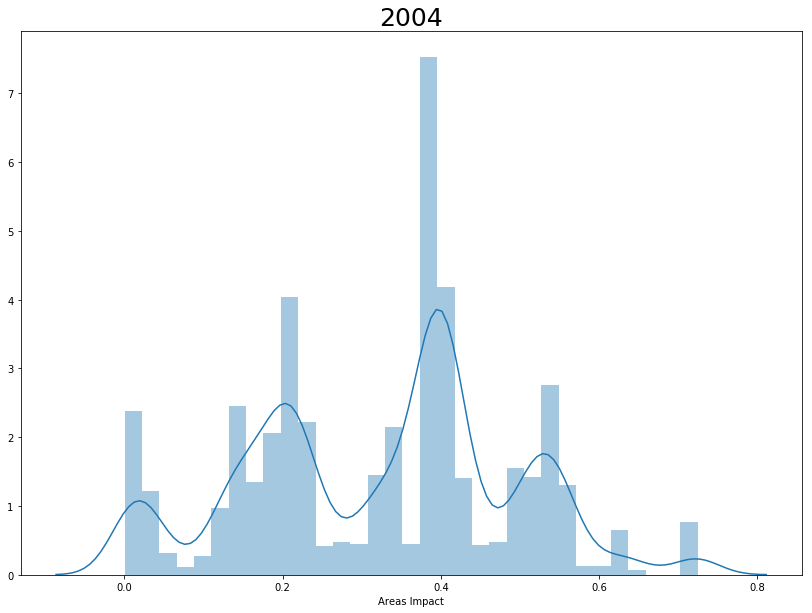

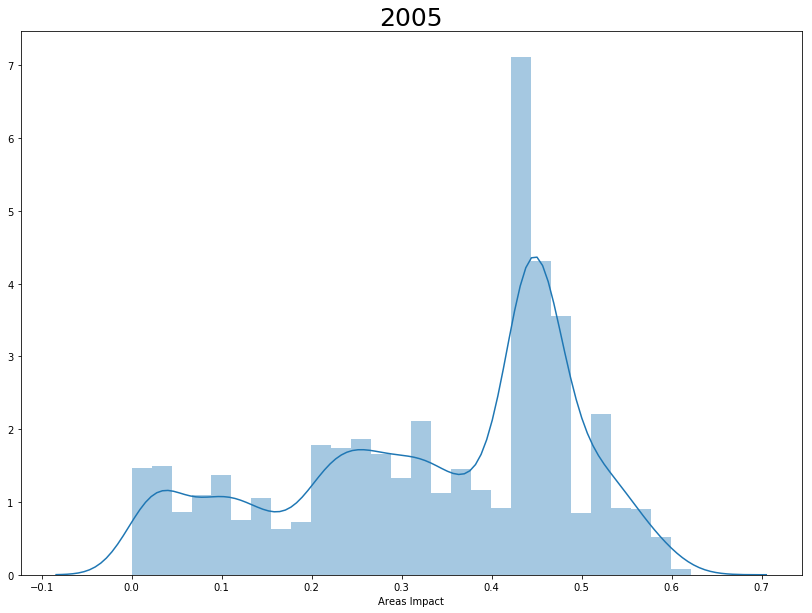

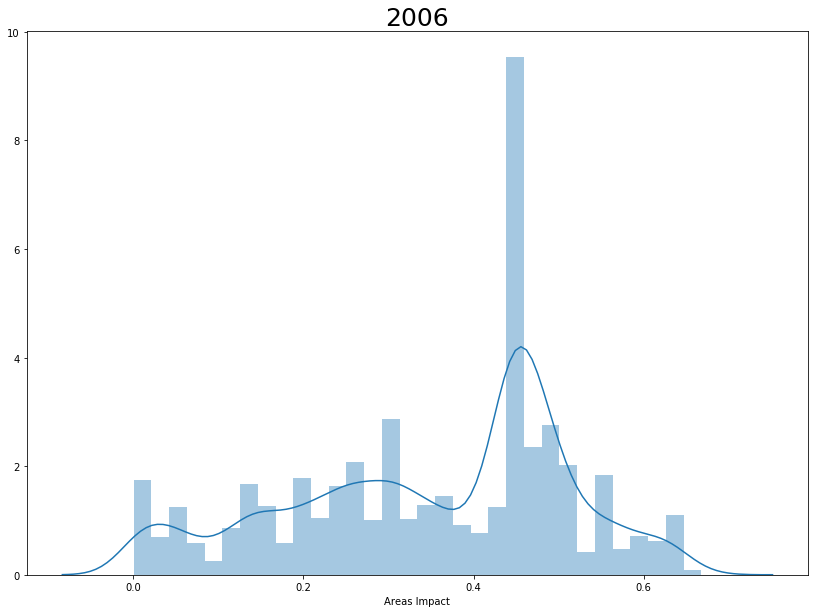

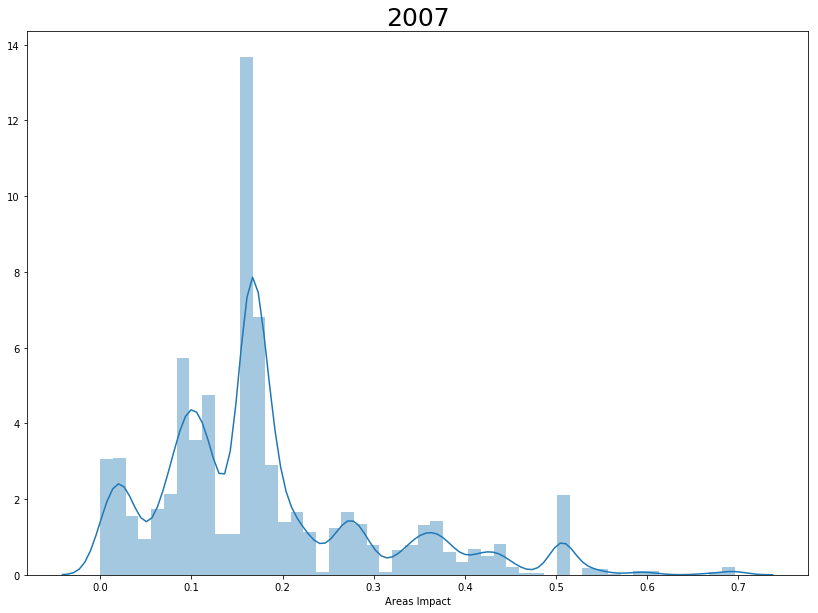

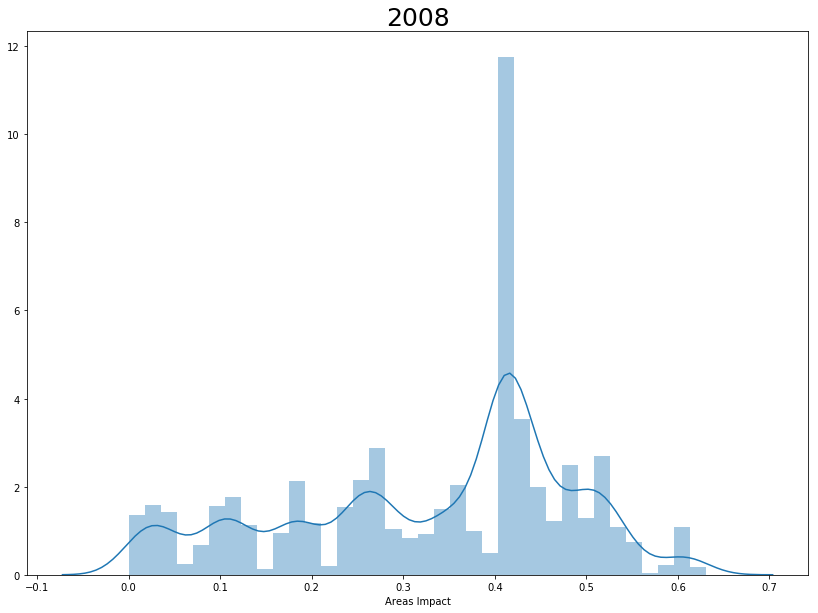

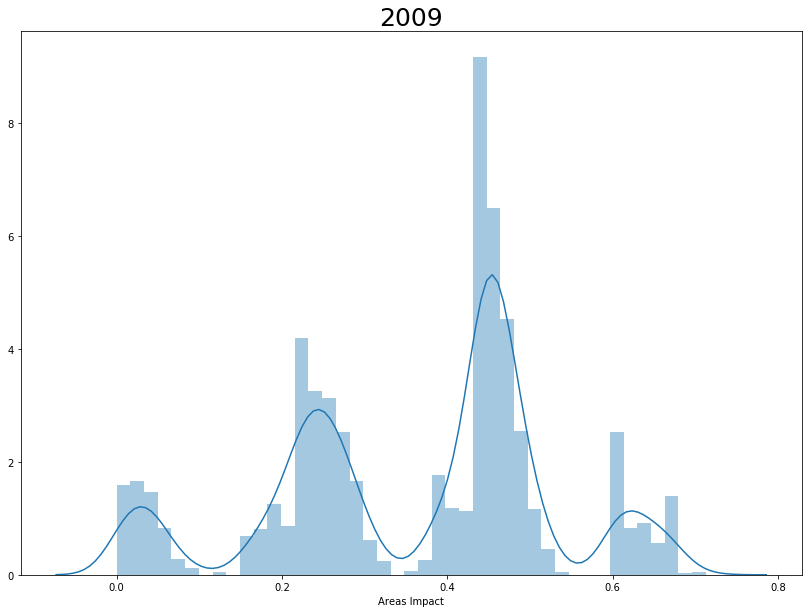

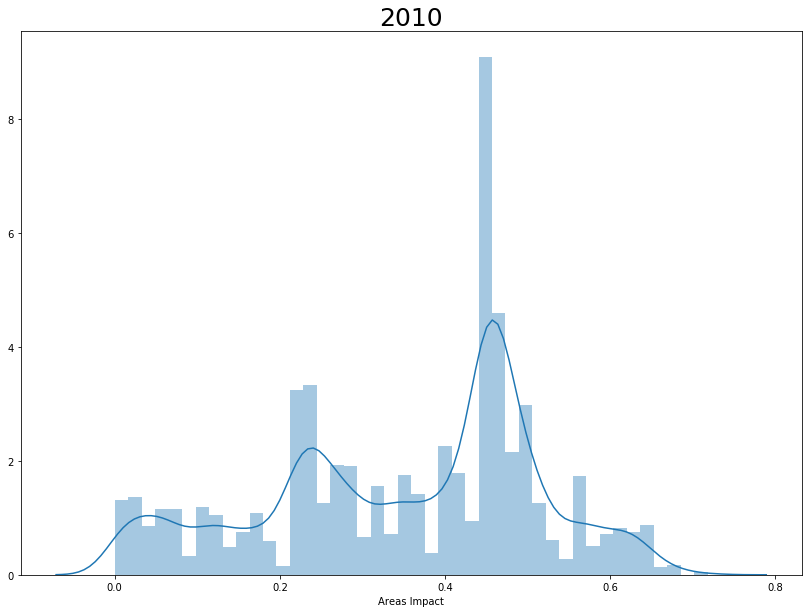

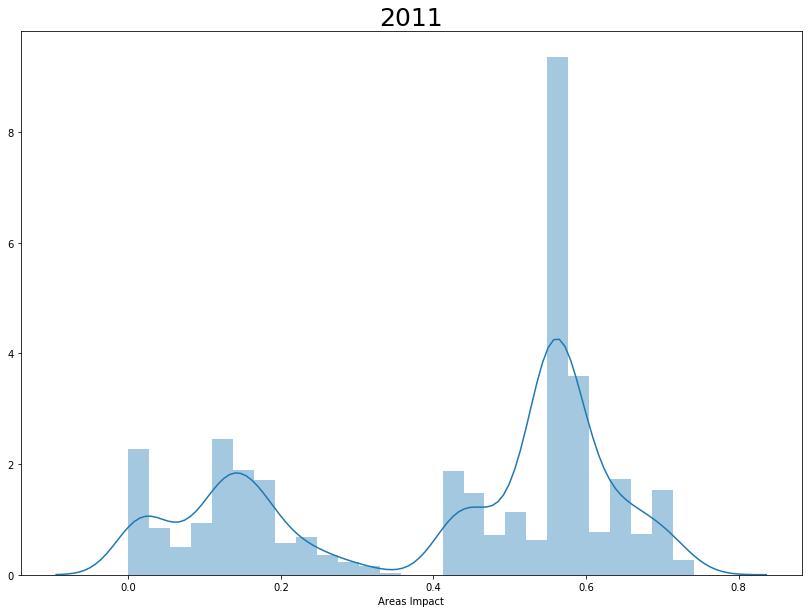

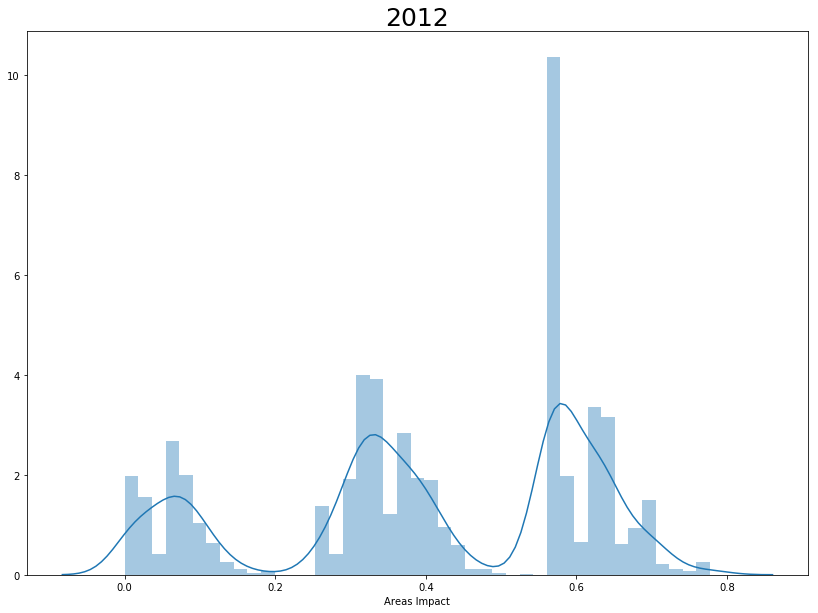

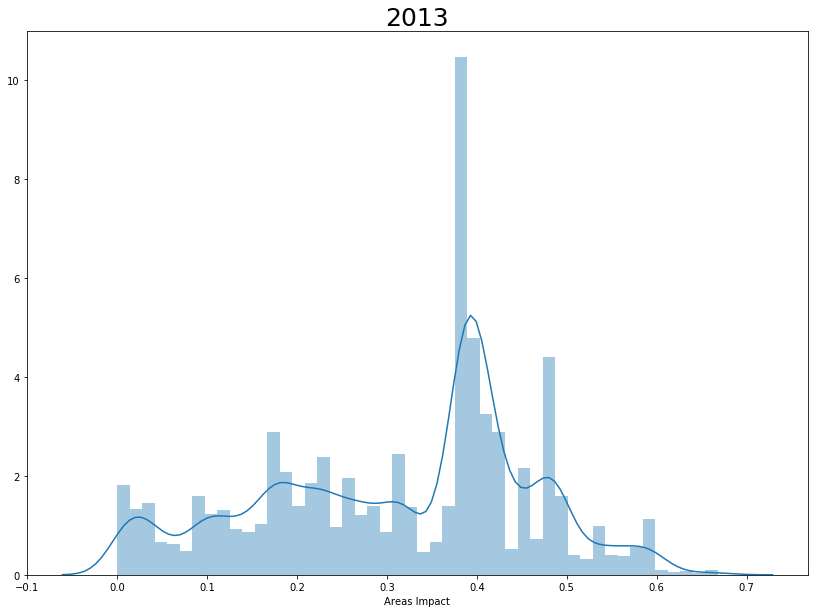

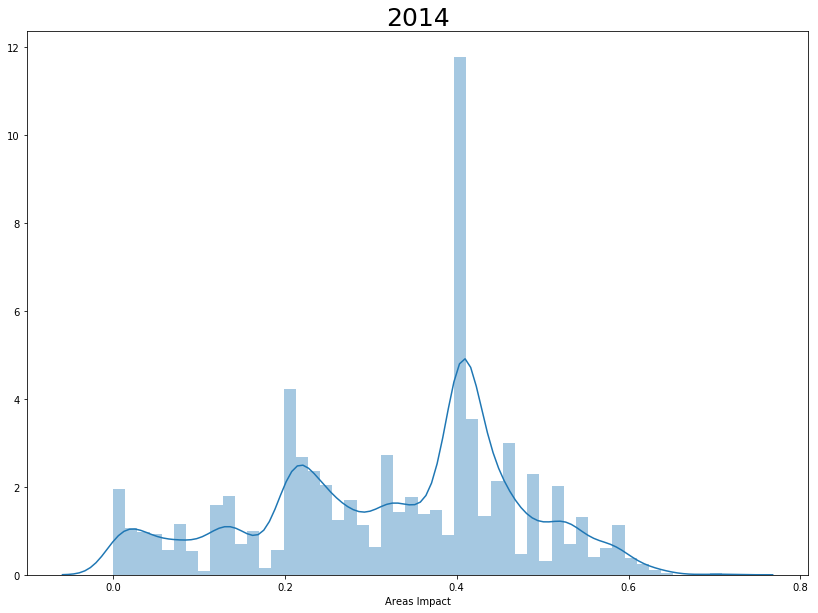

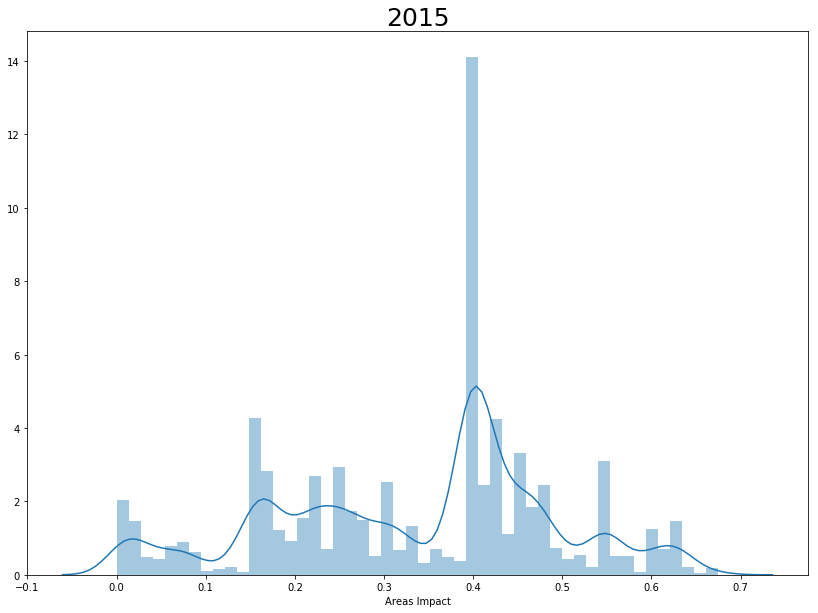

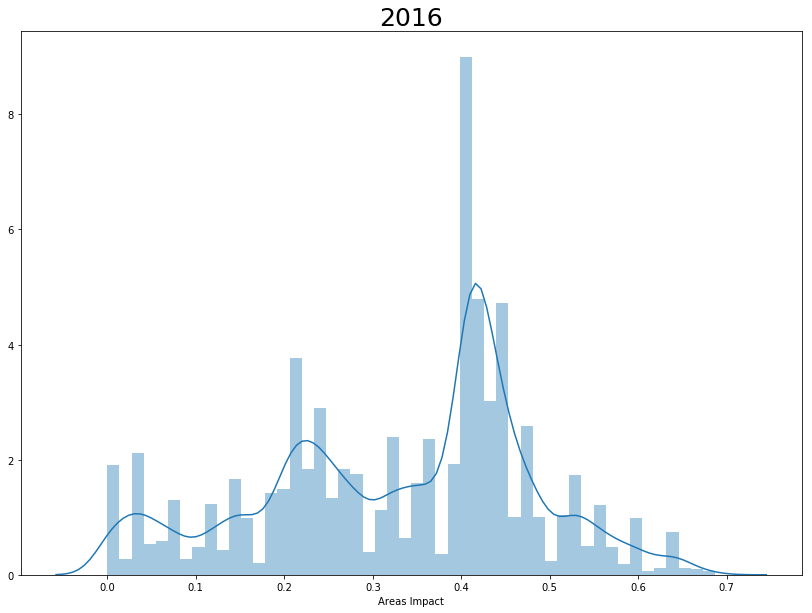

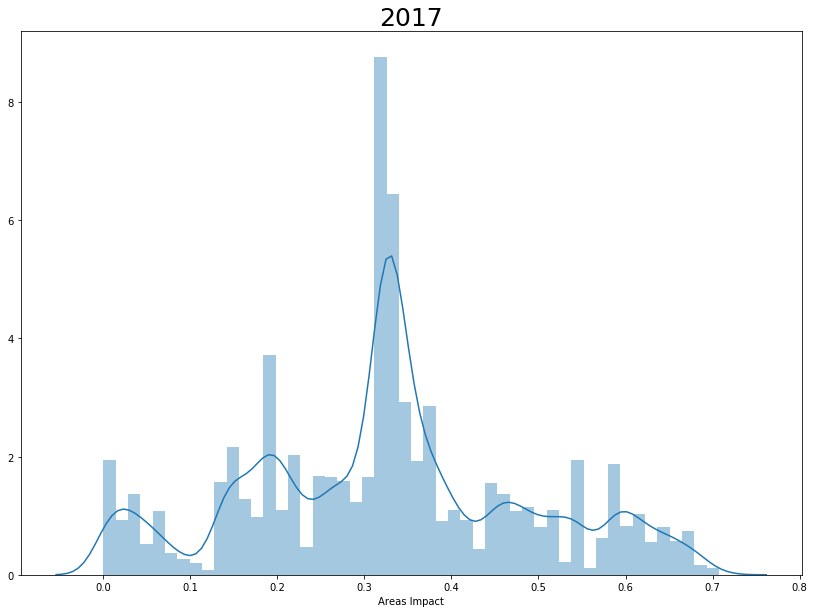

In [97]:
list1 = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i in range(len(list1)):
    Areas_Impact_every_year = data.loc[data['Year Published'].isin([str(list1[i])])]
    Areas_Impact_every_year = Areas_Impact_every_year['Areas Impact']
    fig, saxis = plt.subplots(1,1,figsize=(14,10))
    sns.distplot(Areas_Impact_every_year,ax = saxis)
    saxis.set_title(str(list1[i]),fontsize=25)

count    346772.000000
mean          0.040461
std           0.039844
min           0.000000
25%           0.000952
50%           0.006965
75%           0.081065
max           0.104113
Name: Keywords Impact, dtype: float64


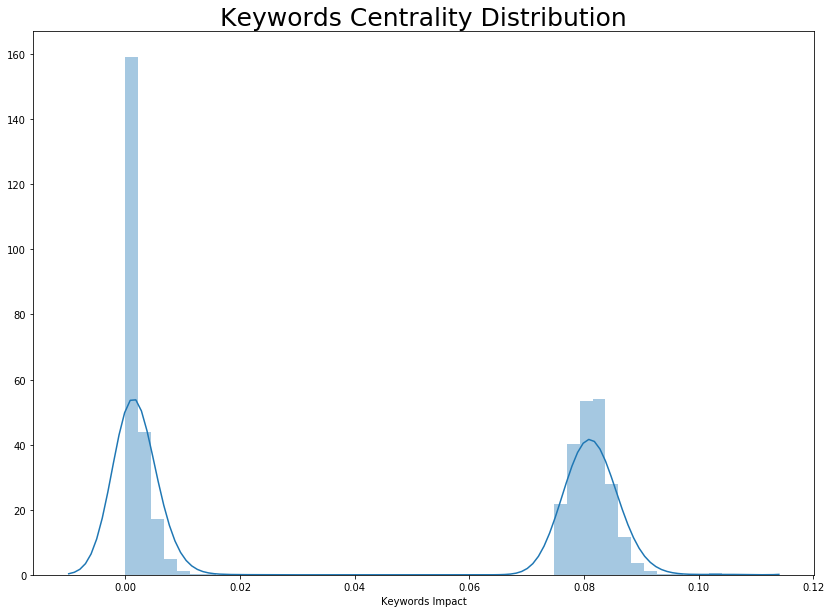

In [98]:
Keywords_Impact_all = data['Keywords Impact']
Keywords_Impact_all.replace(np.nan, 0, inplace=True)
Keywords_Impact_all.replace(np.inf, 0, inplace=True)
print(Keywords_Impact_all.describe())
f,ax= plt.subplots(figsize = (14,10))
sns.distplot(Keywords_Impact_all,ax = ax)
ax.set_title('Keywords Centrality Distribution',fontsize=25)
plt.savefig("Keywords_Centrality.png" ) 

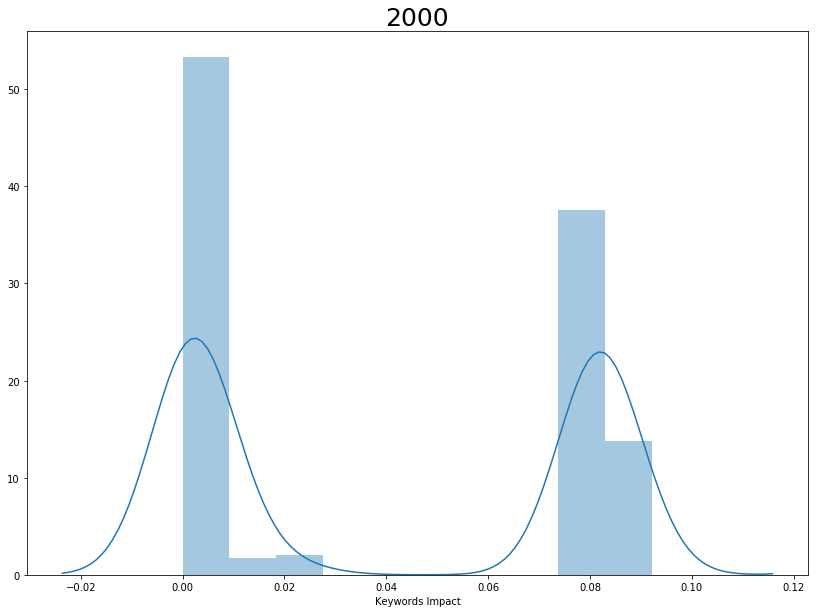

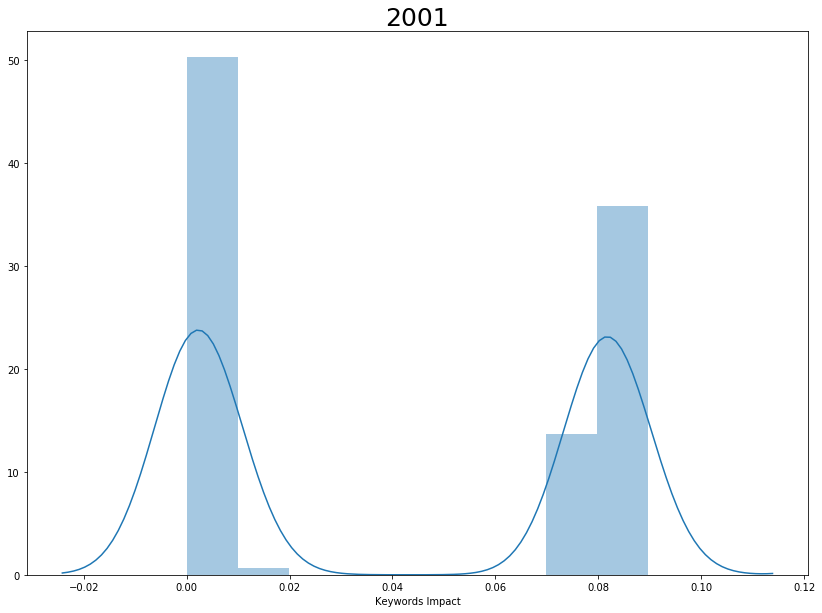

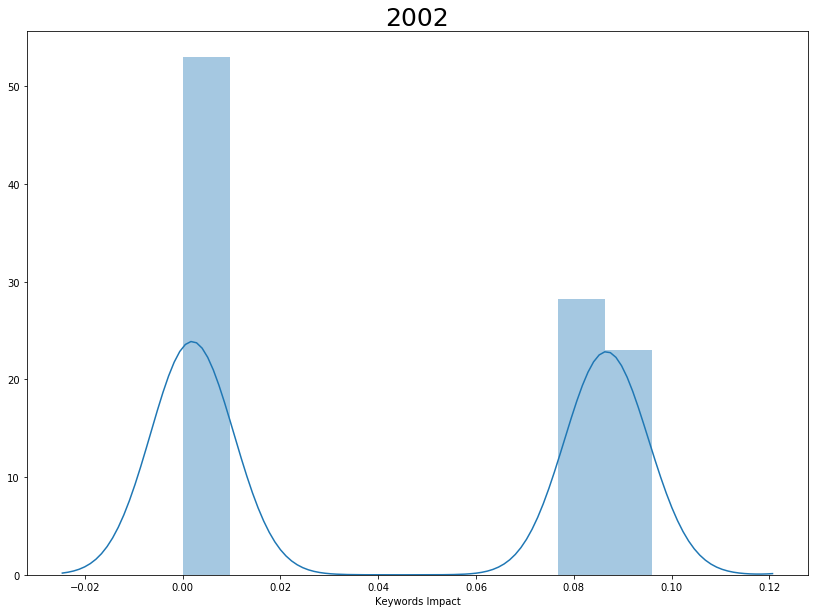

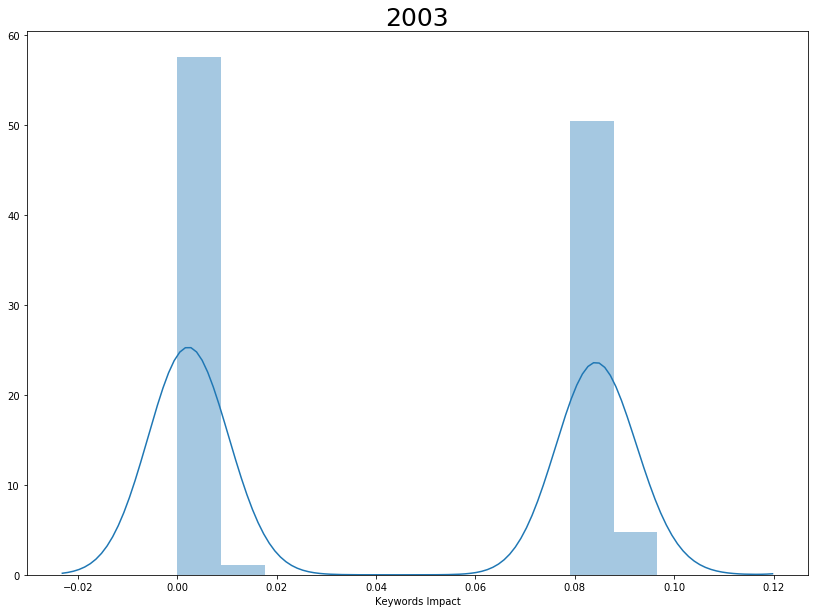

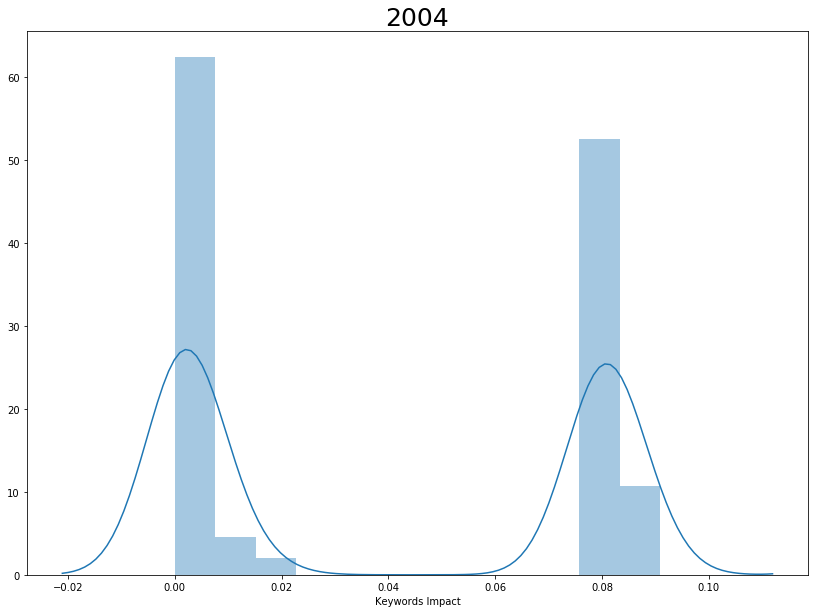

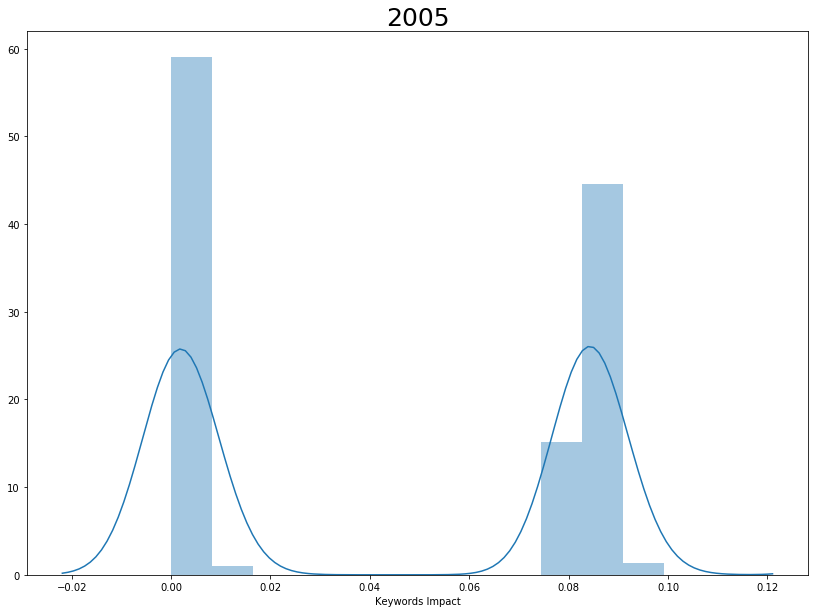

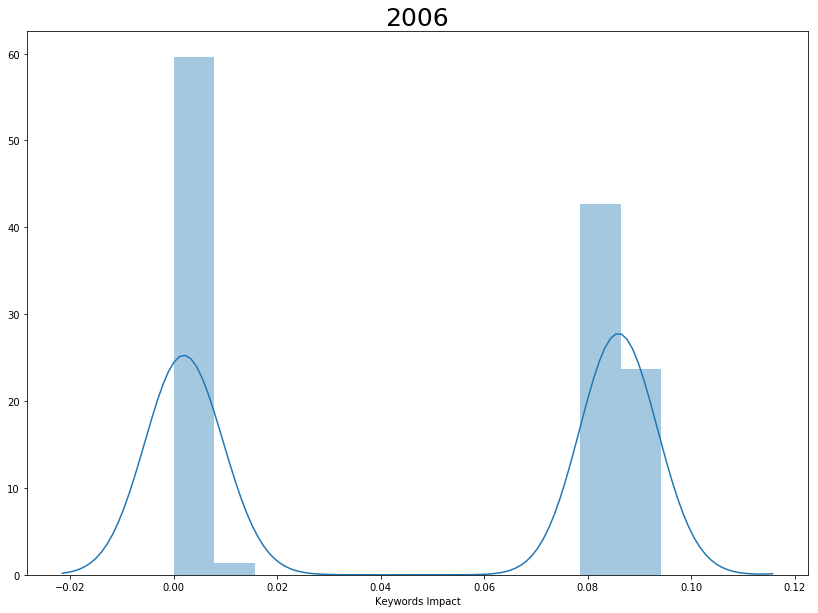

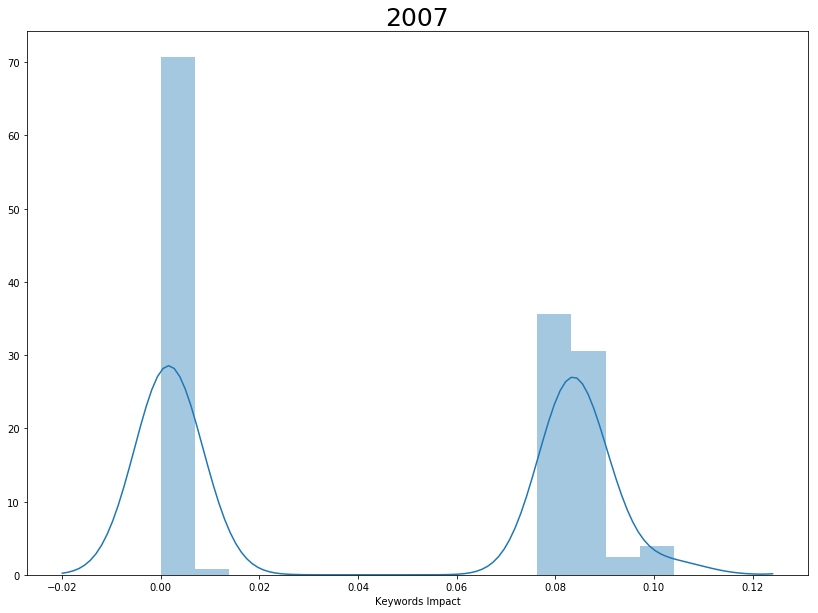

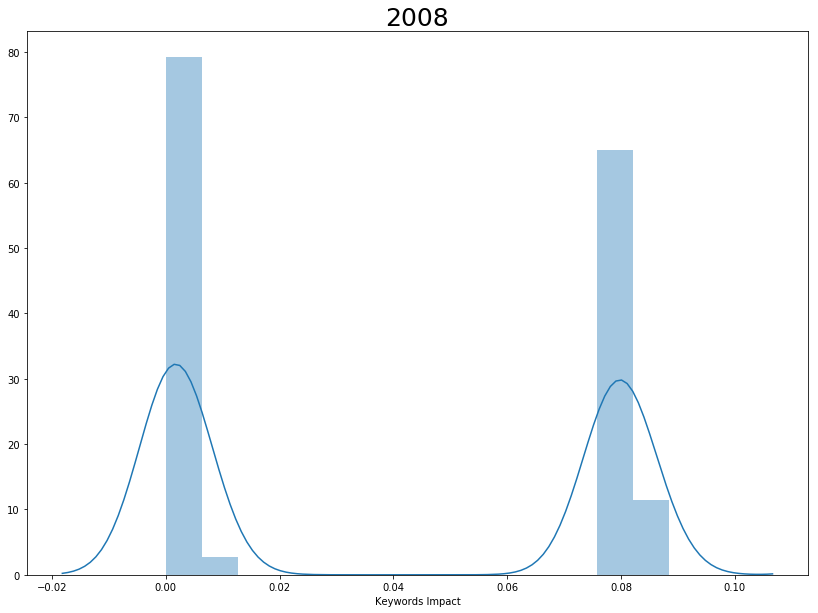

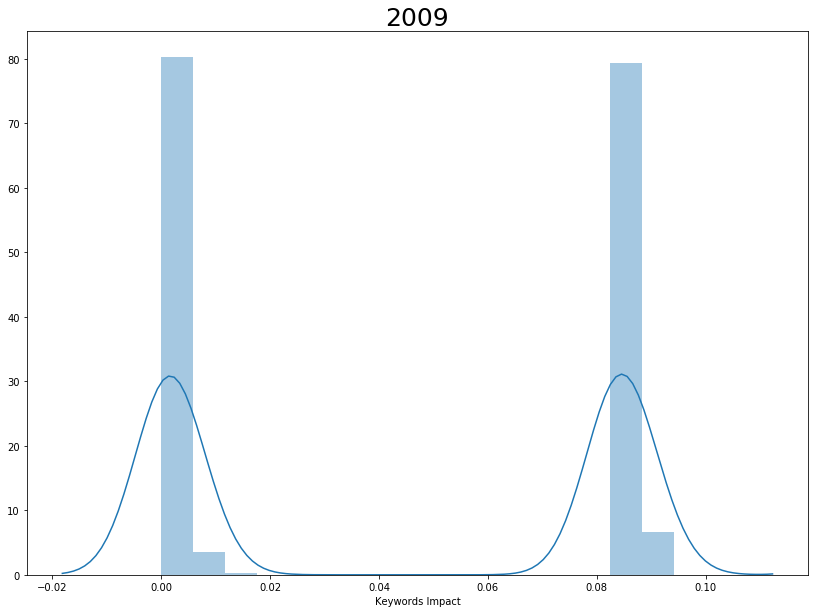

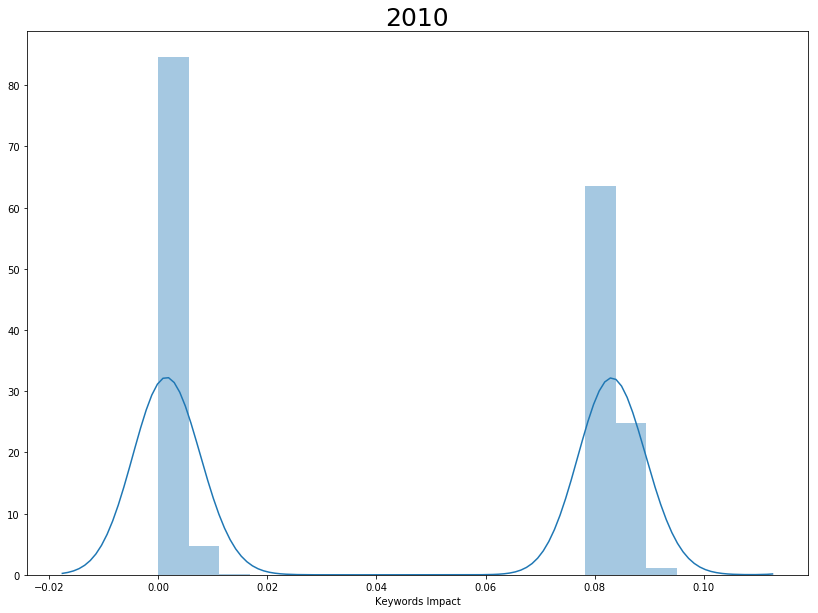

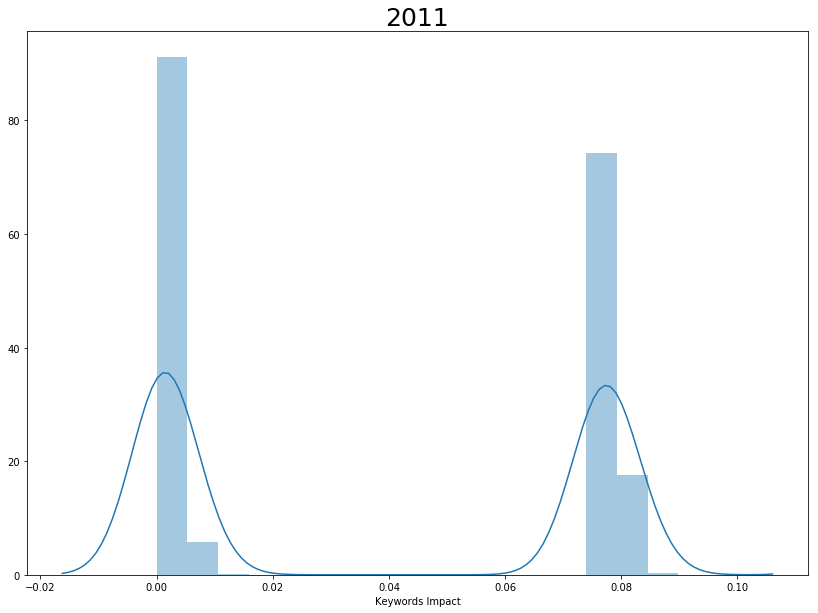

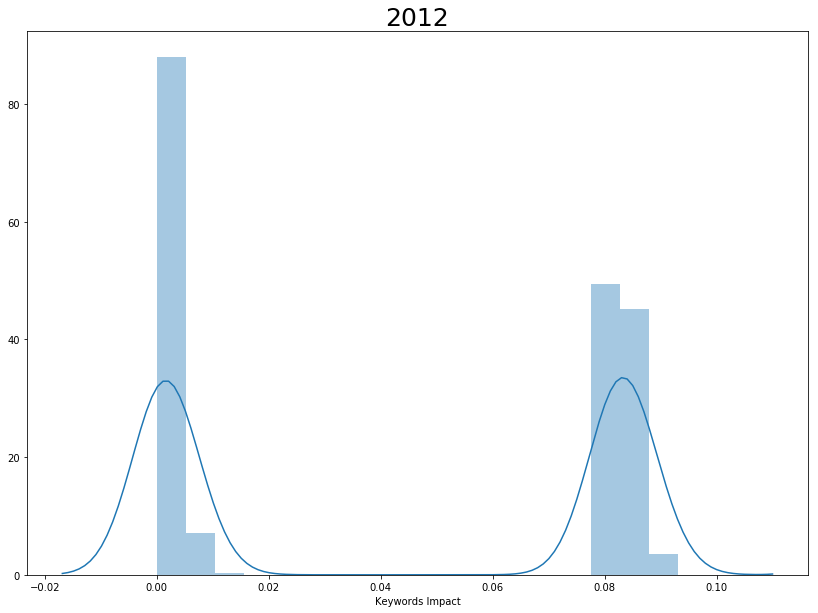

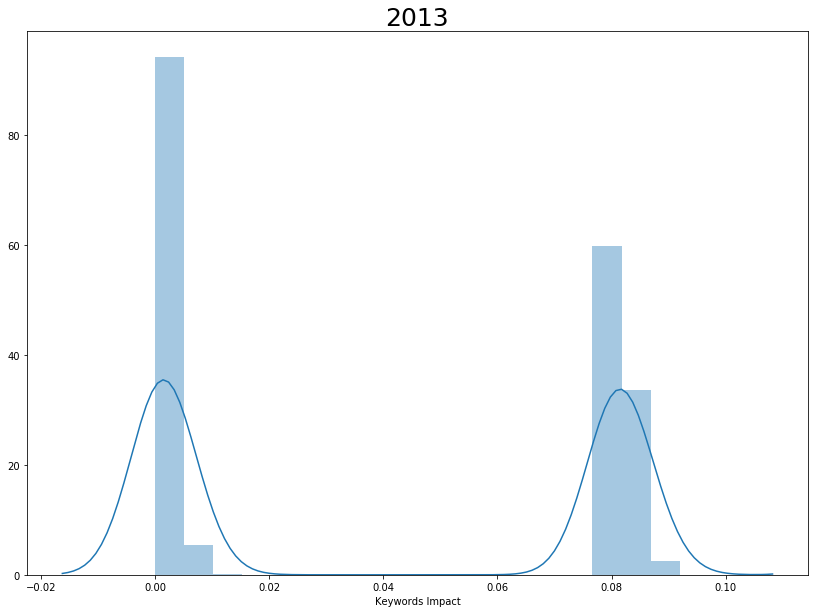

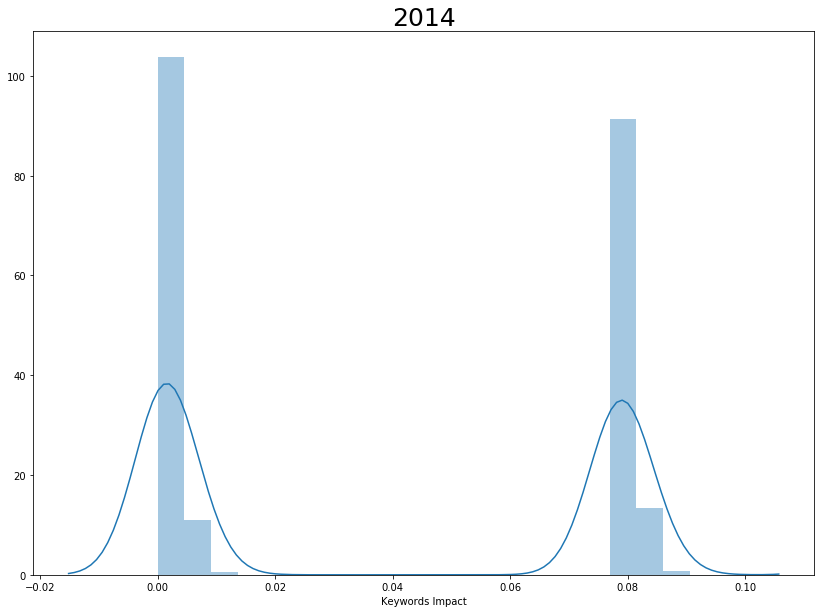

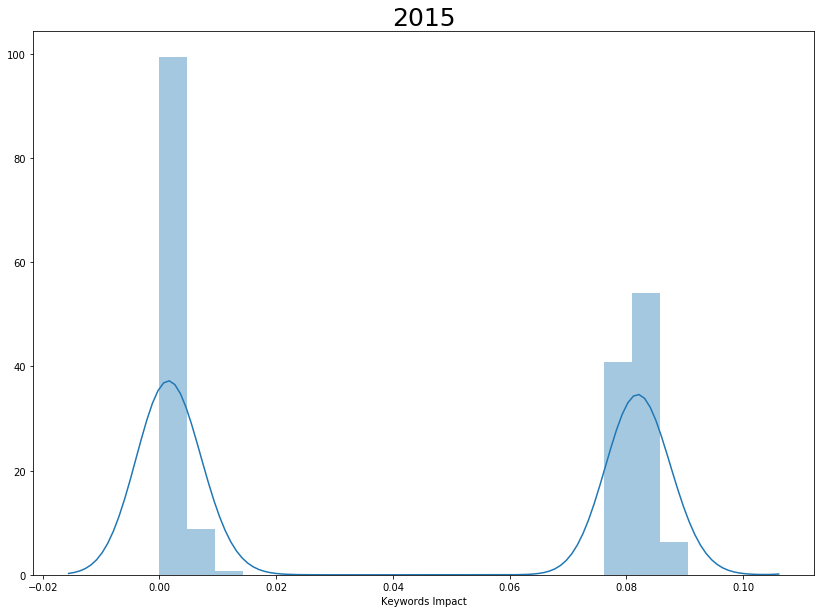

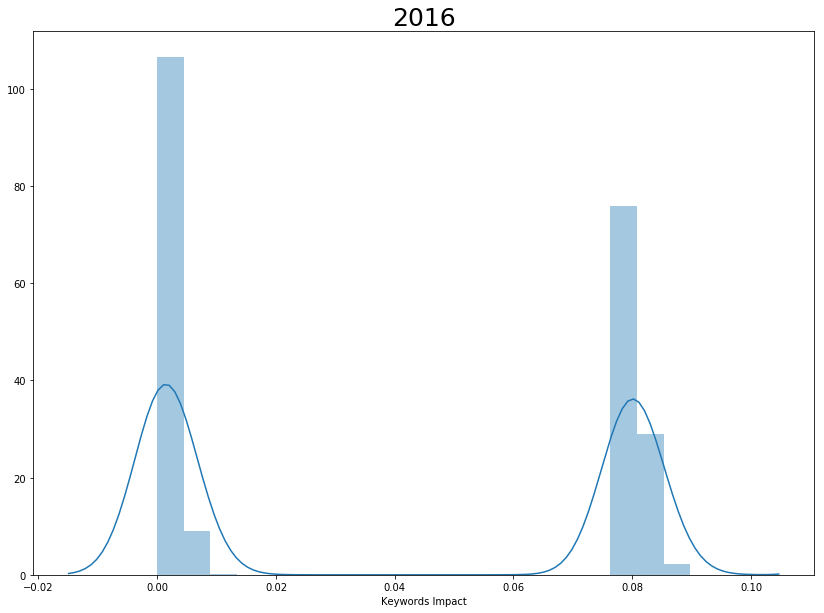

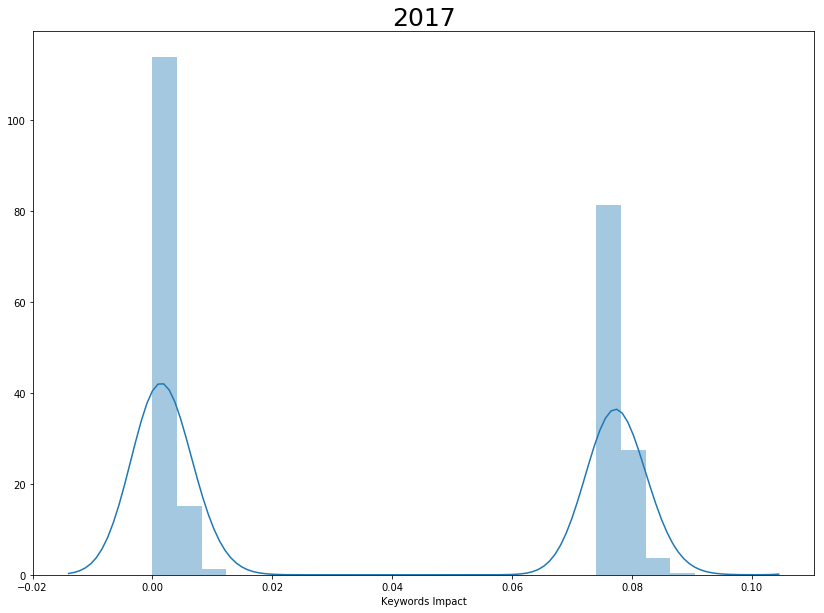

In [7]:
list1 = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i in range(len(list1)):
    Keywords_Impact_every_year = data.loc[data['Year Published'].isin([str(list1[i])])]
    Keywords_Impact_every_year = Keywords_Impact_every_year['Keywords Impact']
    fig, saxis = plt.subplots(1,1,figsize=(14,10))
    sns.distplot(Keywords_Impact_every_year,ax = saxis)
    saxis.set_title(str(list1[i]),fontsize=25)

count    346772.000000
mean          0.000015
std           0.000012
min           0.000006
25%           0.000008
50%           0.000011
75%           0.000018
max           0.000158
Name: Author Rank, dtype: float64


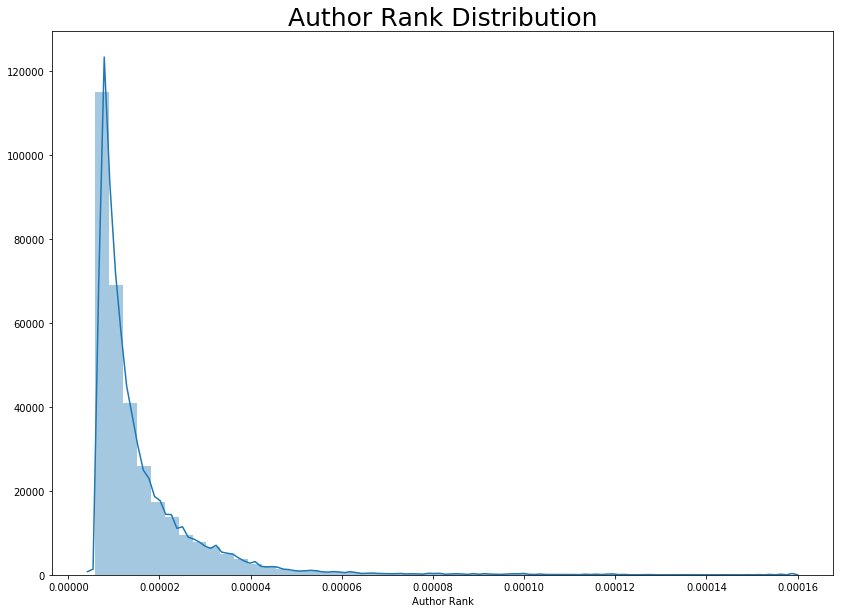

In [99]:
## analyse in Author Rank distribute
Author_Rank_all = data['Author Rank']
Author_Rank_all.replace(np.nan, 0, inplace=True)
Author_Rank_all.replace(np.inf, 0, inplace=True)
print(Author_Rank_all.describe())
f,ax= plt.subplots(figsize = (14,10))
sns.distplot(Author_Rank_all,ax = ax)
ax.set_title('Author Rank Distribution',fontsize=25)
plt.savefig("Author_Rank.png" ) 

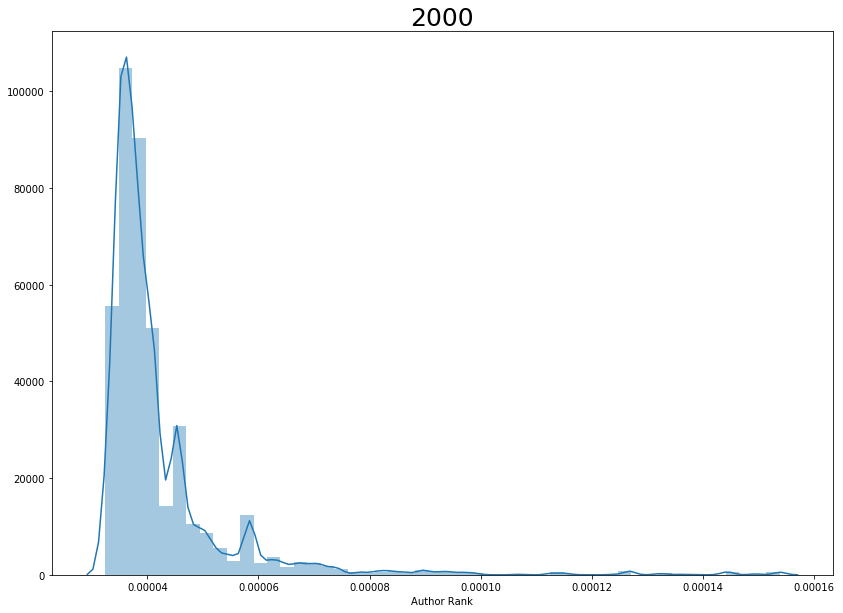

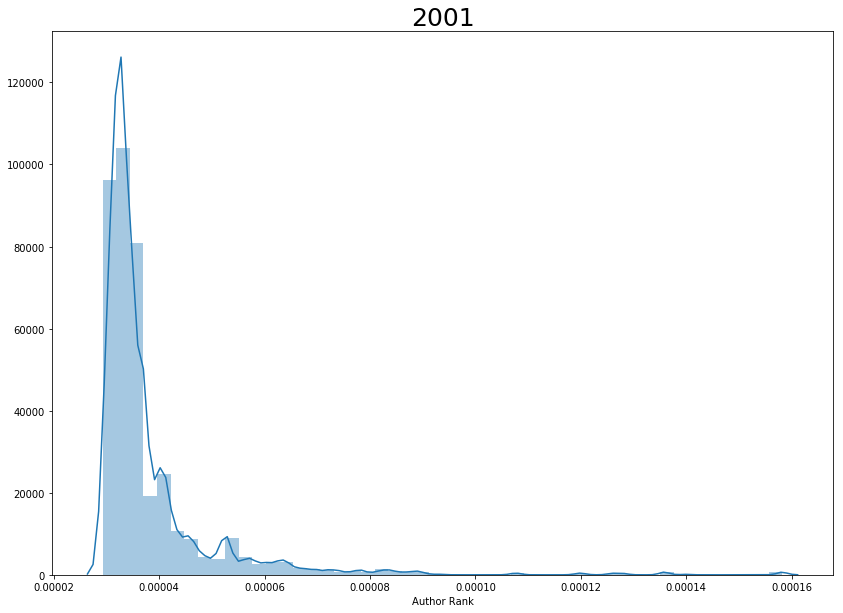

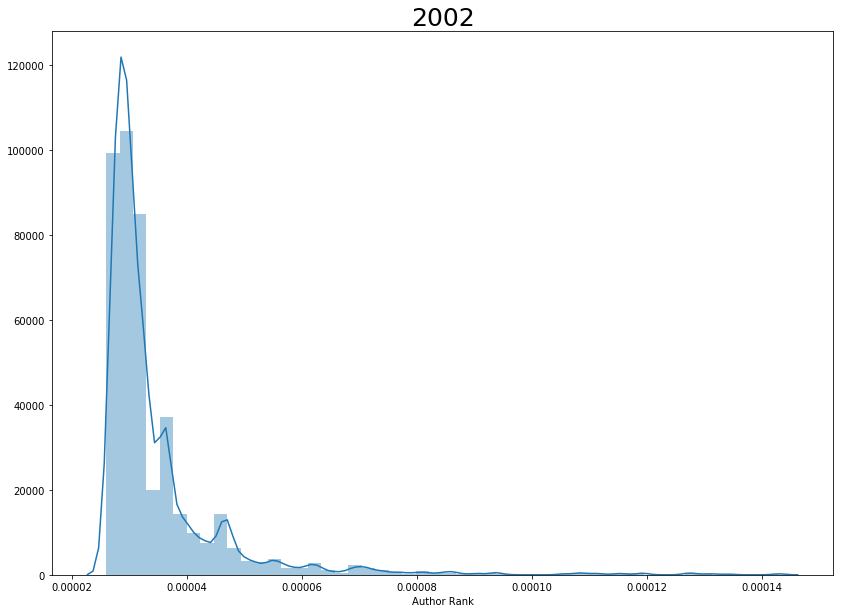

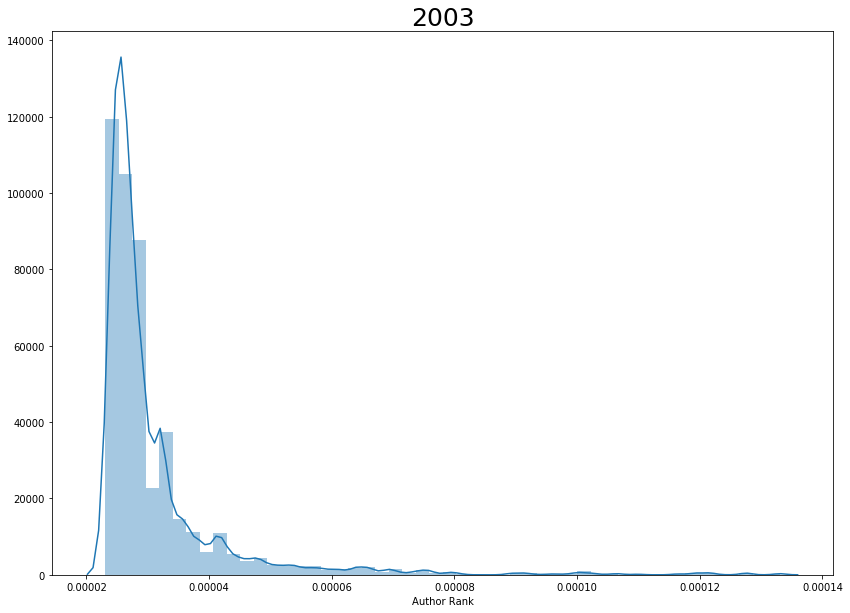

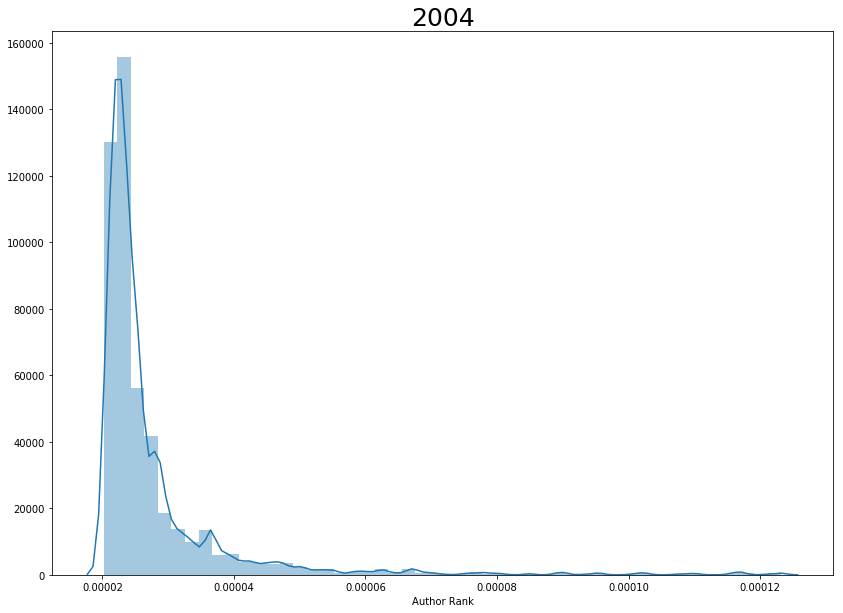

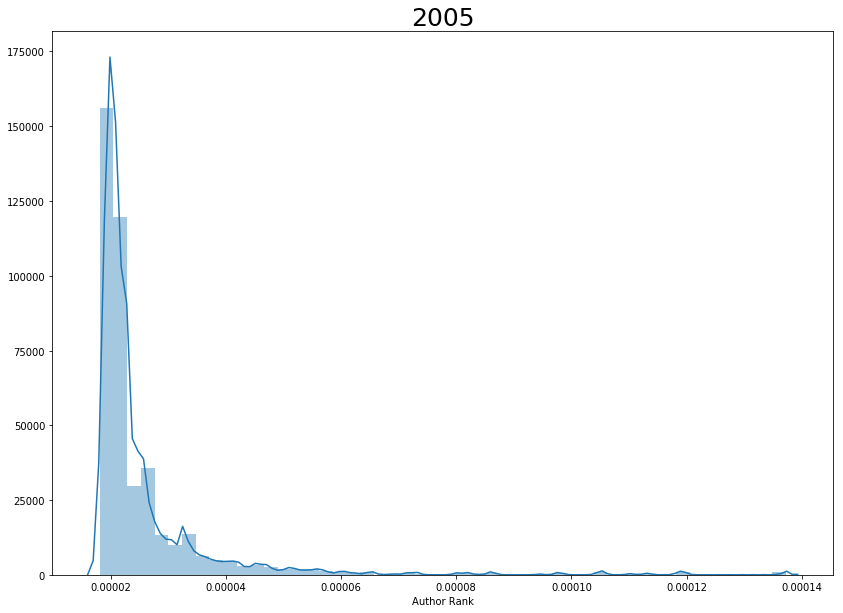

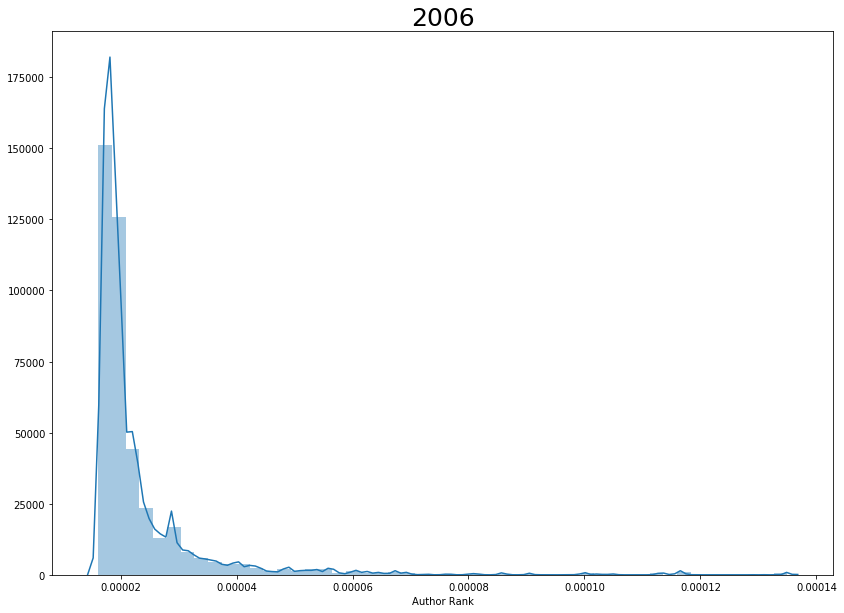

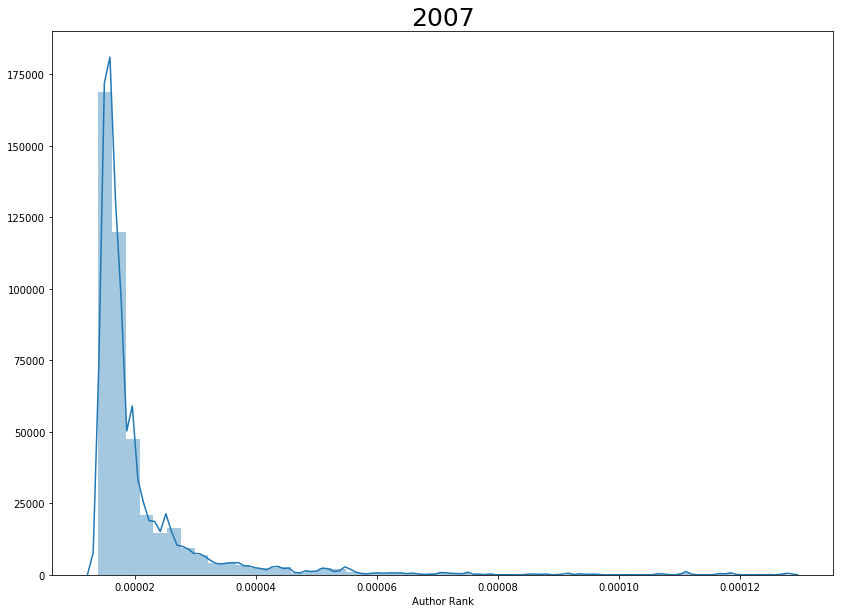

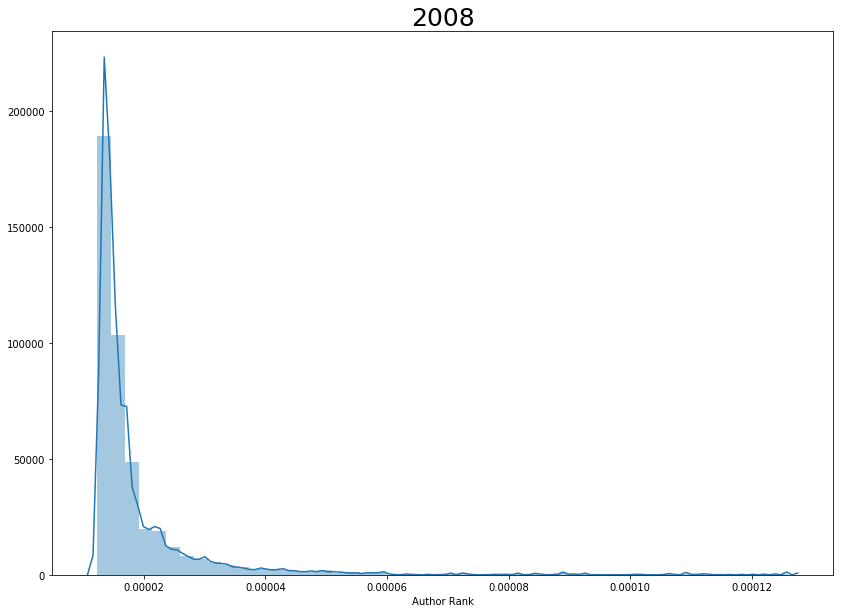

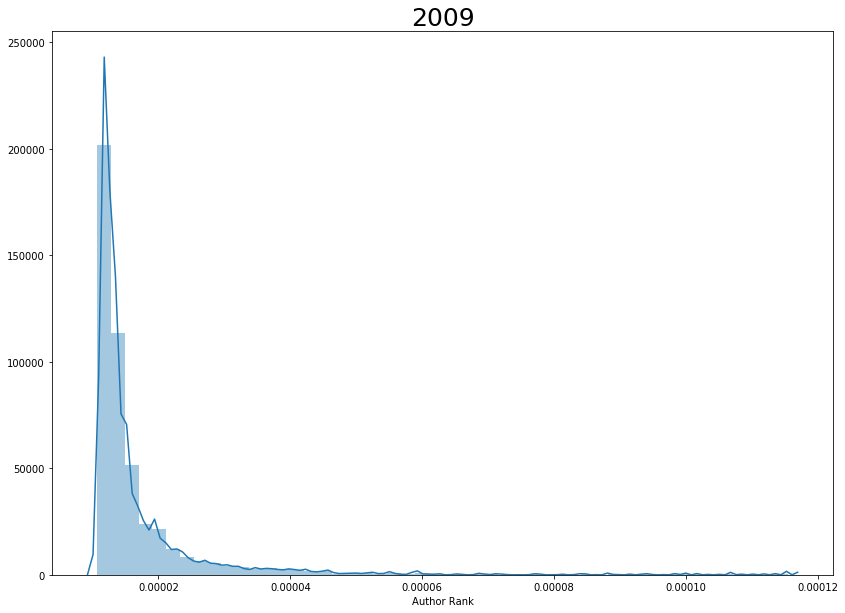

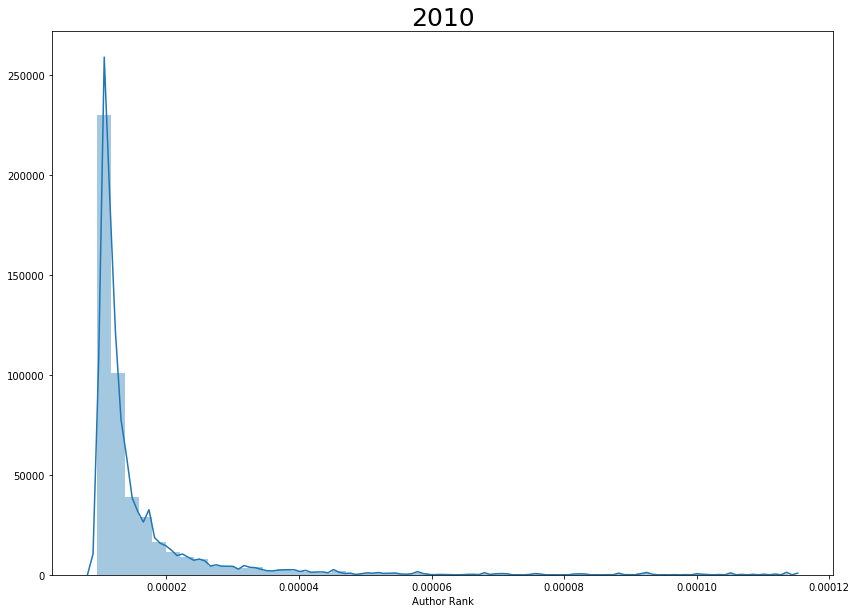

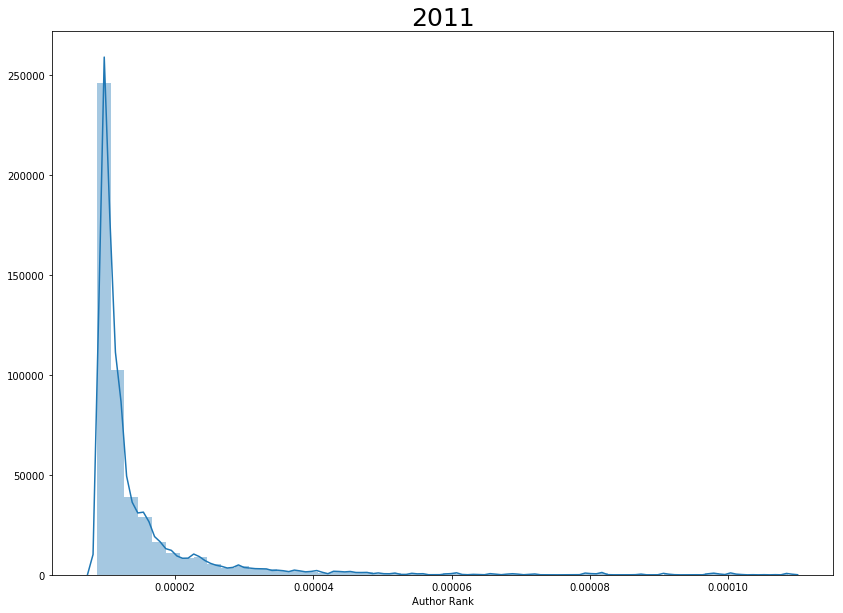

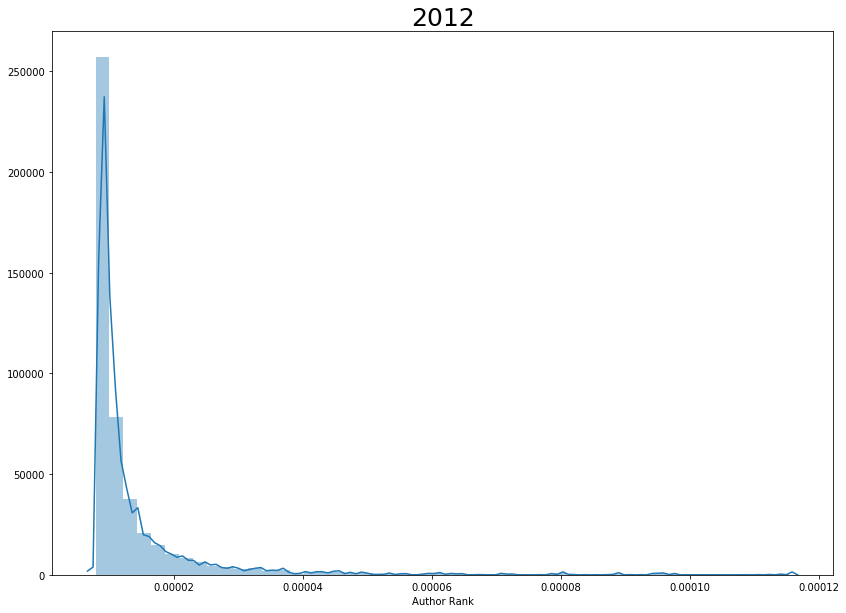

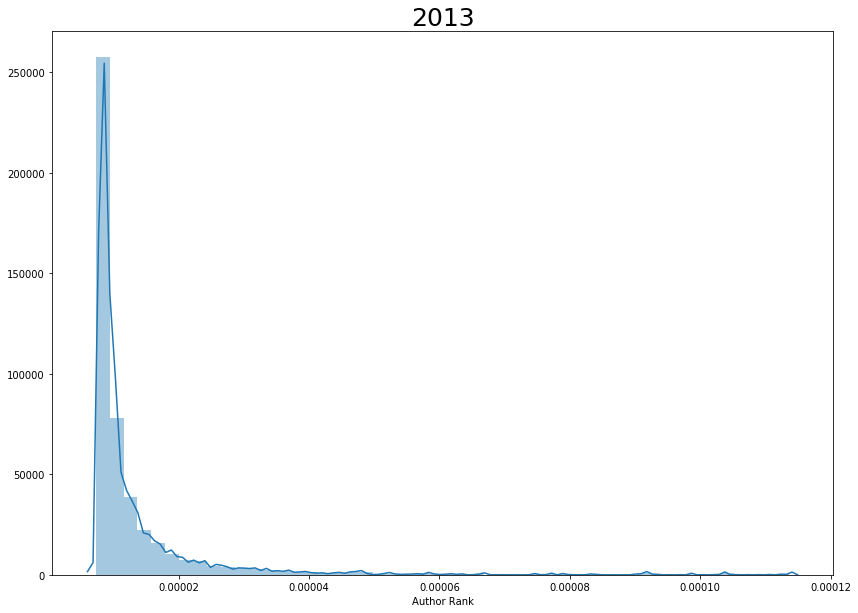

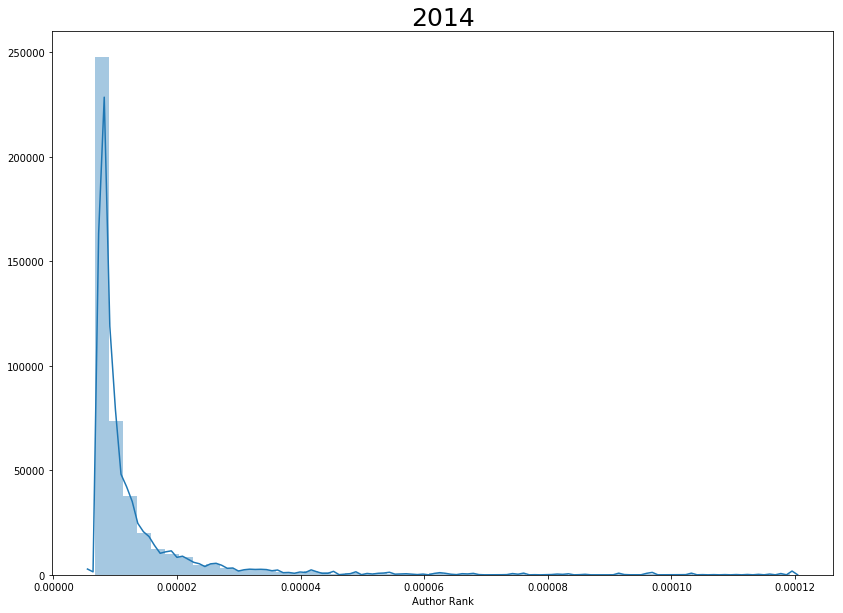

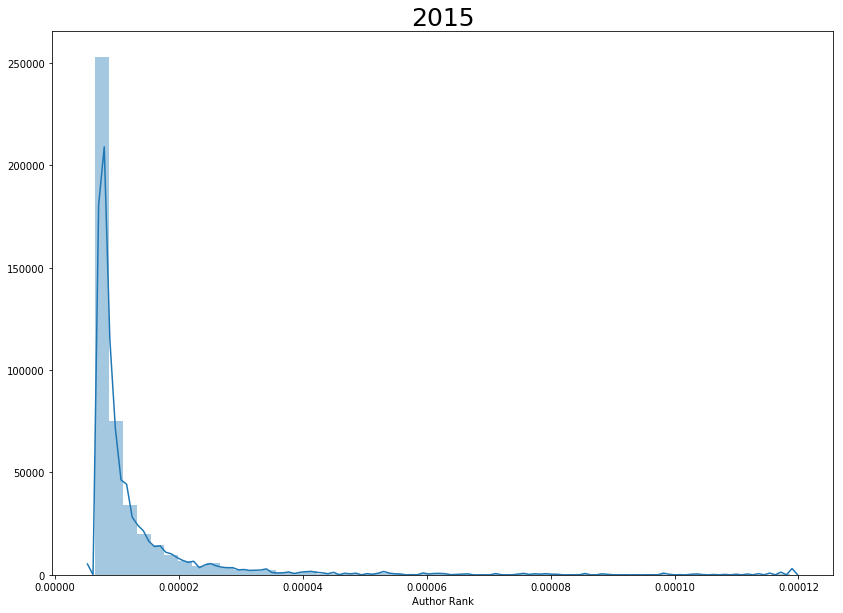

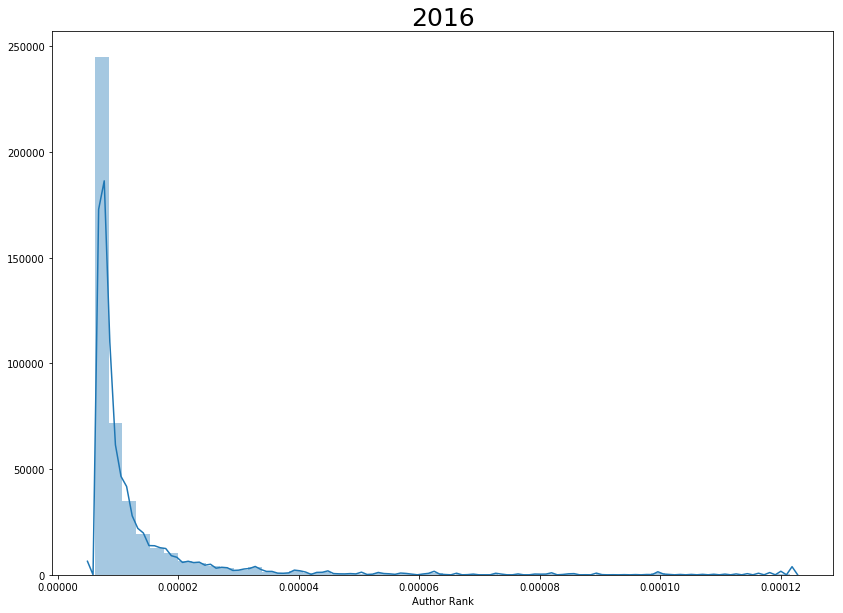

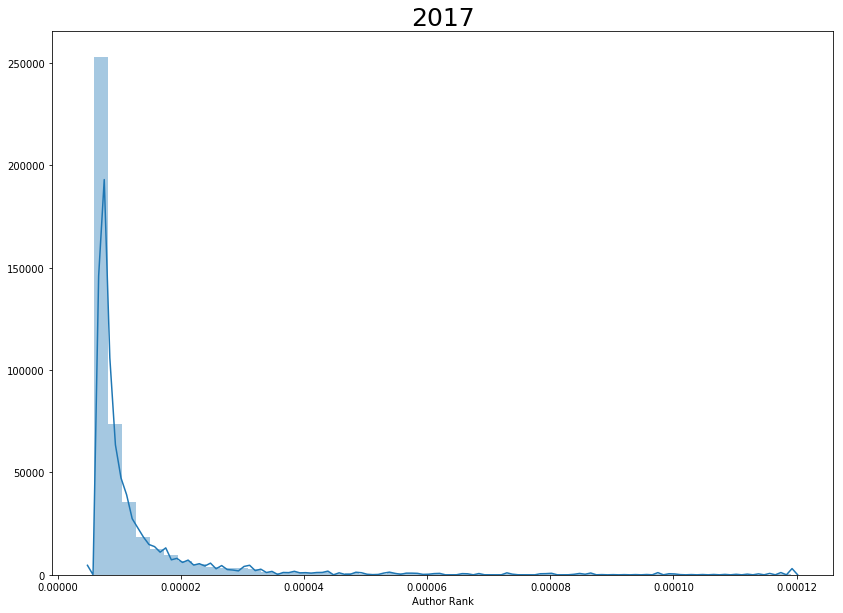

In [100]:
##  Author Rank every_year
list1 = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i in range(len(list1)):
    Author_Rank_every_year = data.loc[data['Year Published'].isin([str(list1[i])])]
    Author_Rank_every_year = Author_Rank_every_year['Author Rank']
    fig, saxis = plt.subplots(1,1,figsize=(14,10))
    sns.distplot(Author_Rank_every_year,ax = saxis)
    saxis.set_title(str(list1[i]),fontsize=25) 

count    346772.000000
mean          0.000015
std           0.000008
min           0.000009
25%           0.000010
50%           0.000012
75%           0.000016
max           0.000068
Name: Publisher Rank, dtype: float64


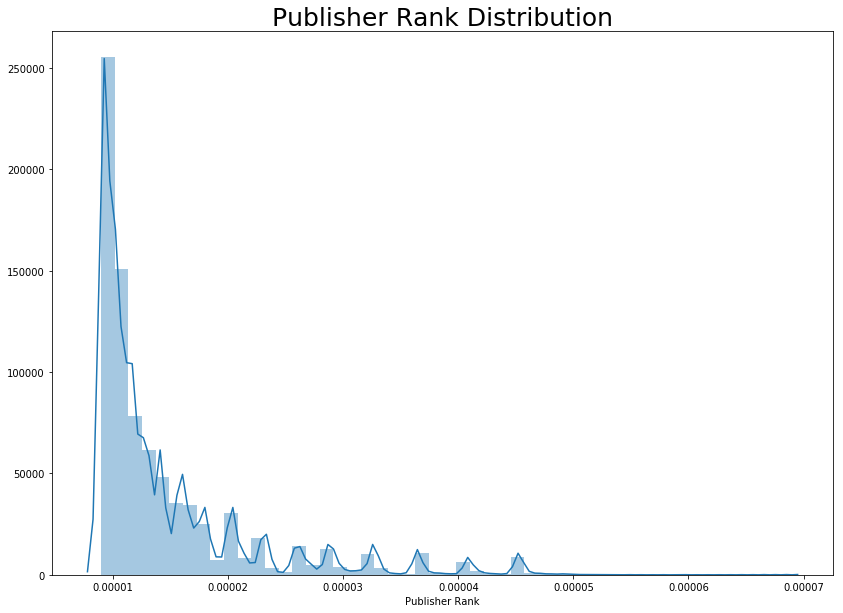

In [101]:
Publisher_Rank_all = data['Publisher Rank']
Publisher_Rank_all.replace(np.nan, 0, inplace=True)
Publisher_Rank_all.replace(np.inf, 0, inplace=True)
print(Publisher_Rank_all.describe())
f,ax= plt.subplots(figsize = (14,10))
sns.distplot(Publisher_Rank_all,ax = ax)
ax.set_title('Publisher Rank Distribution',fontsize=25)
plt.savefig("Publisher_Rank.png" ) 

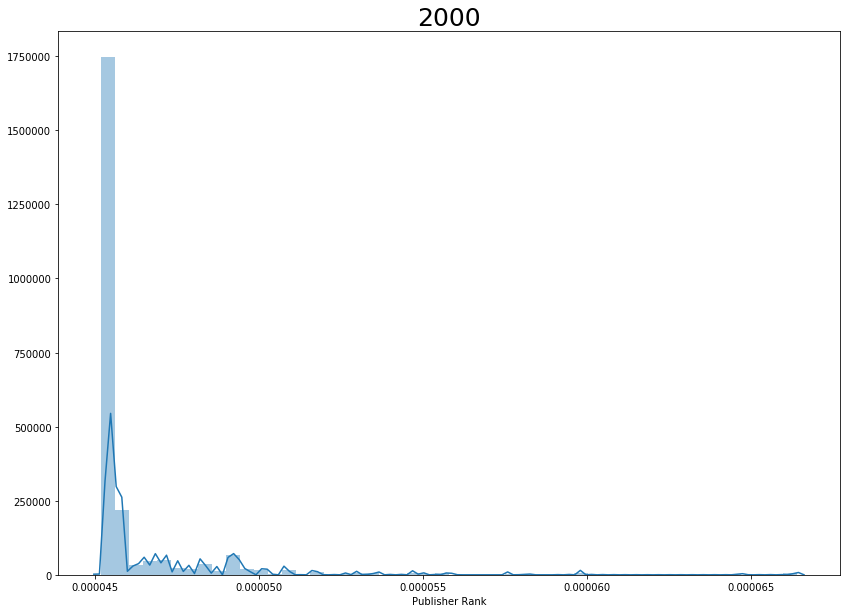

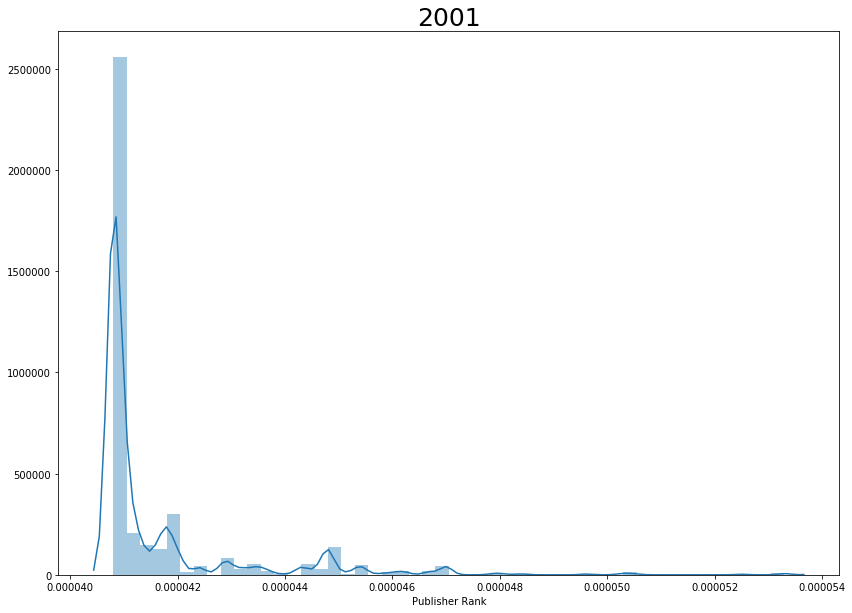

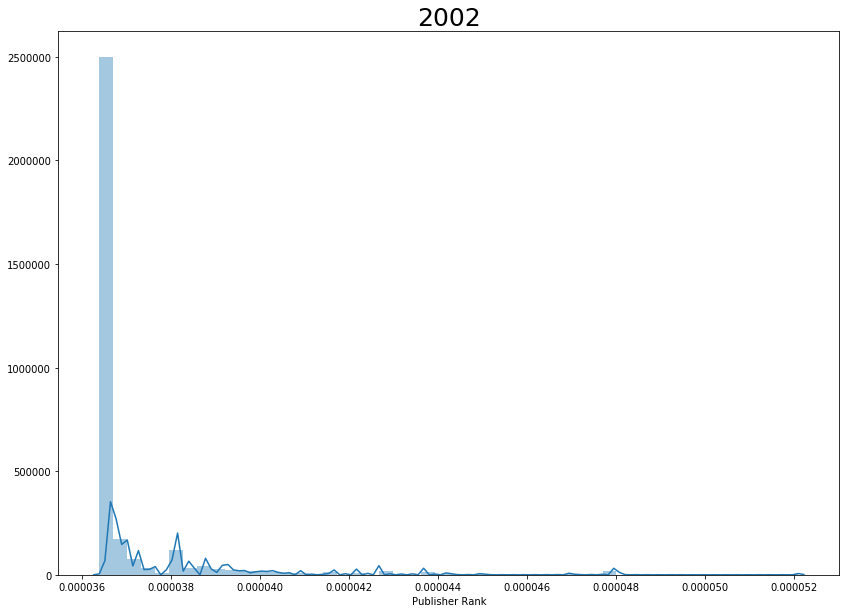

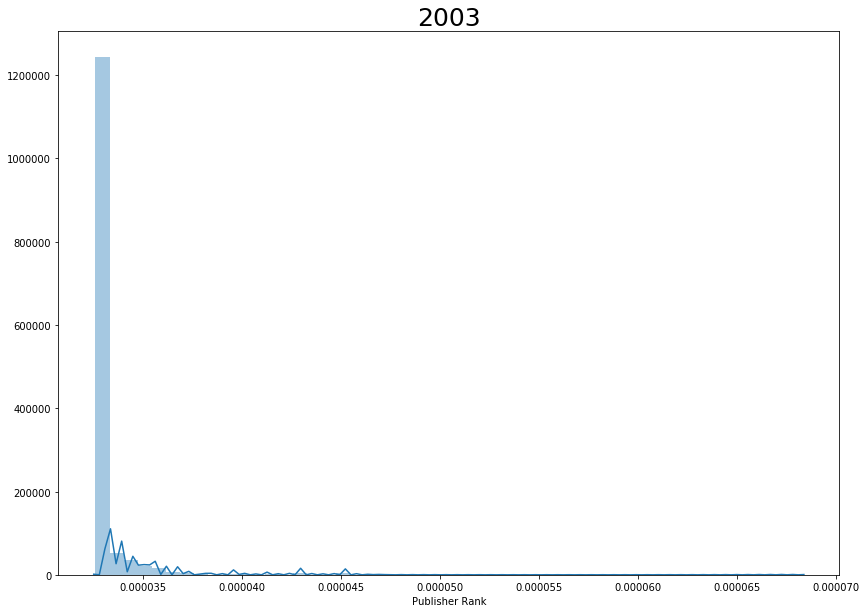

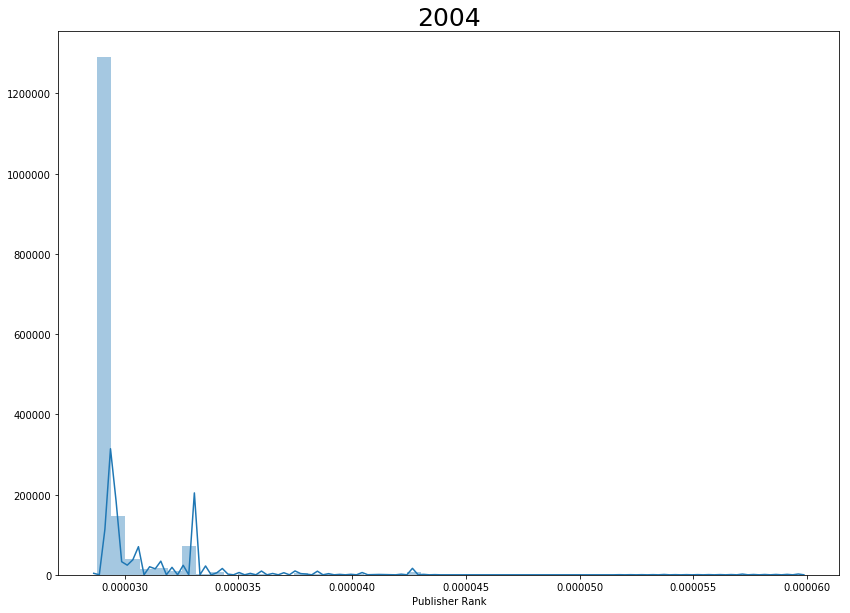

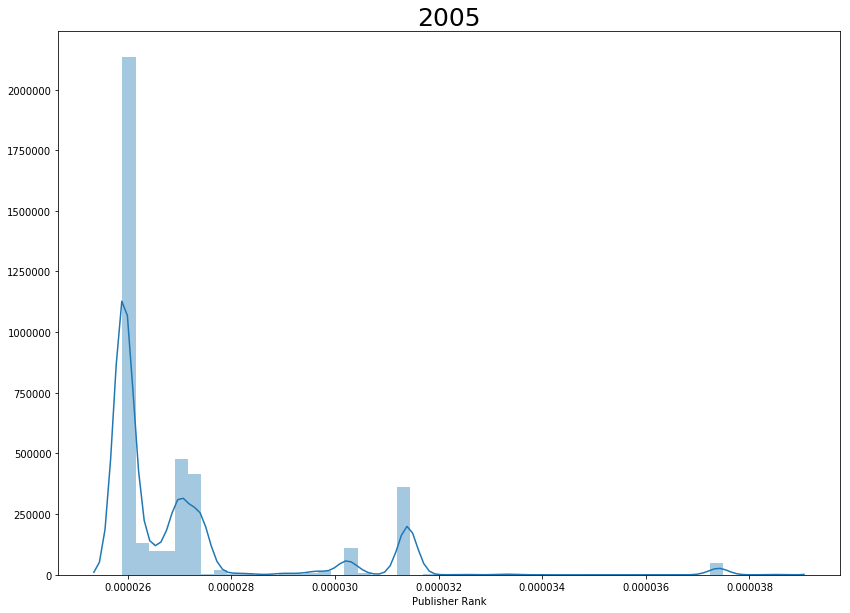

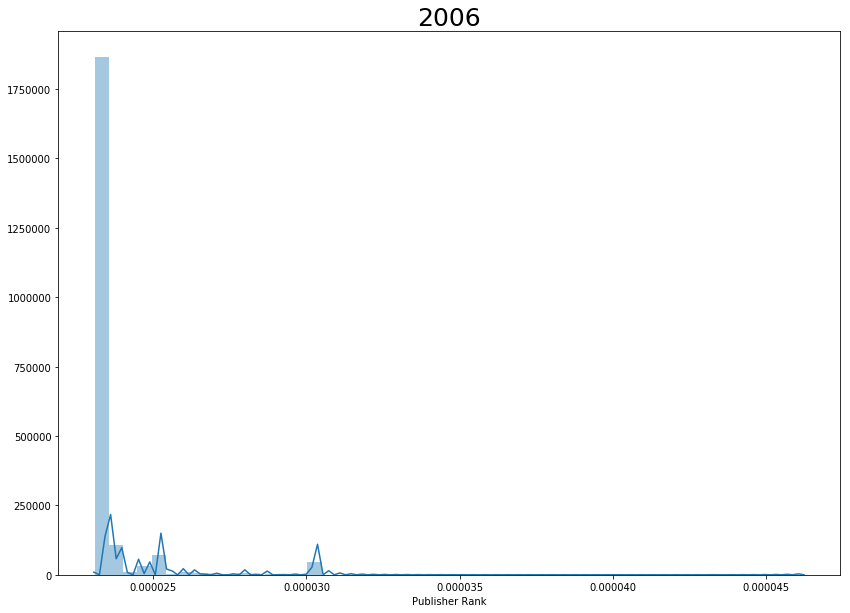

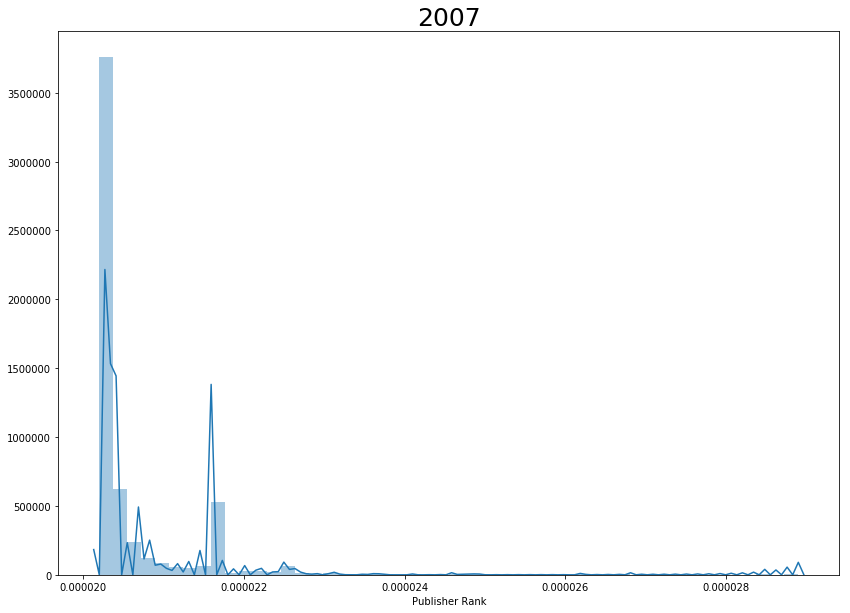

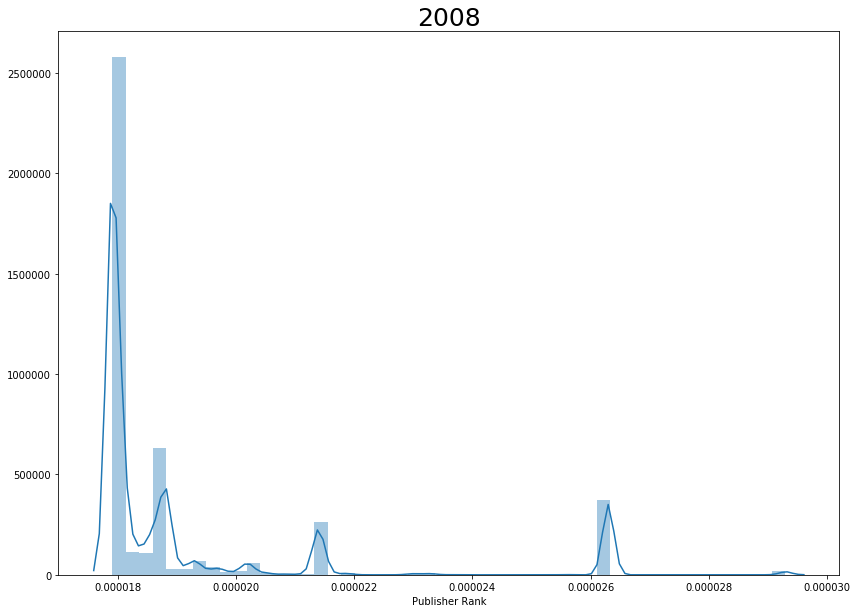

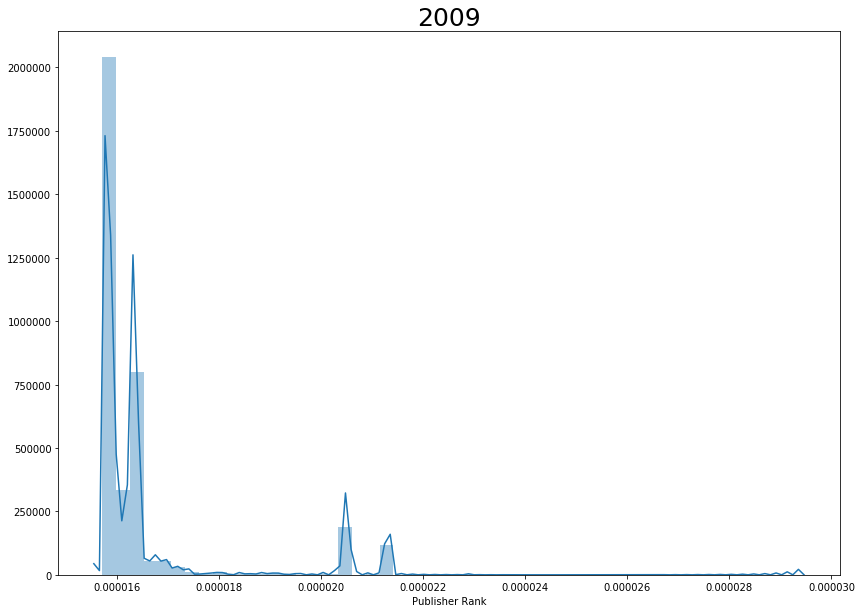

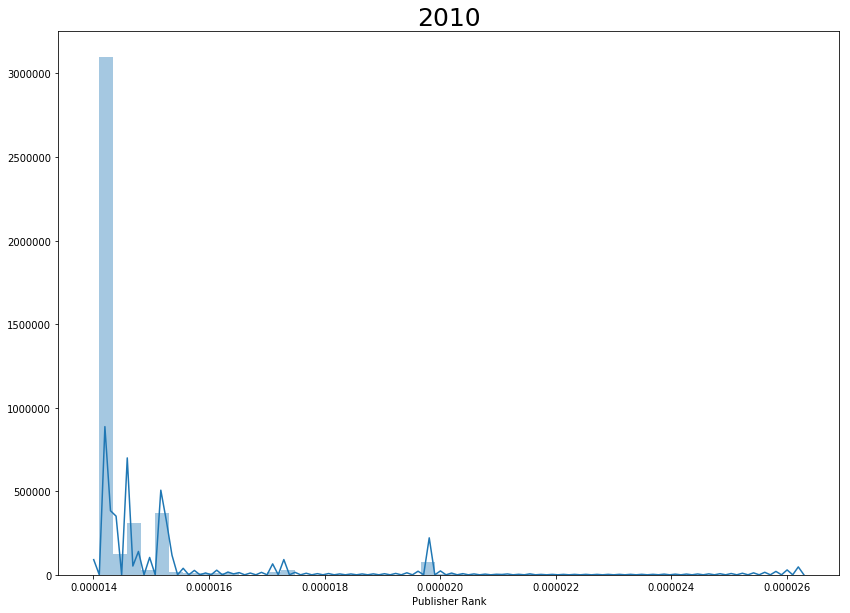

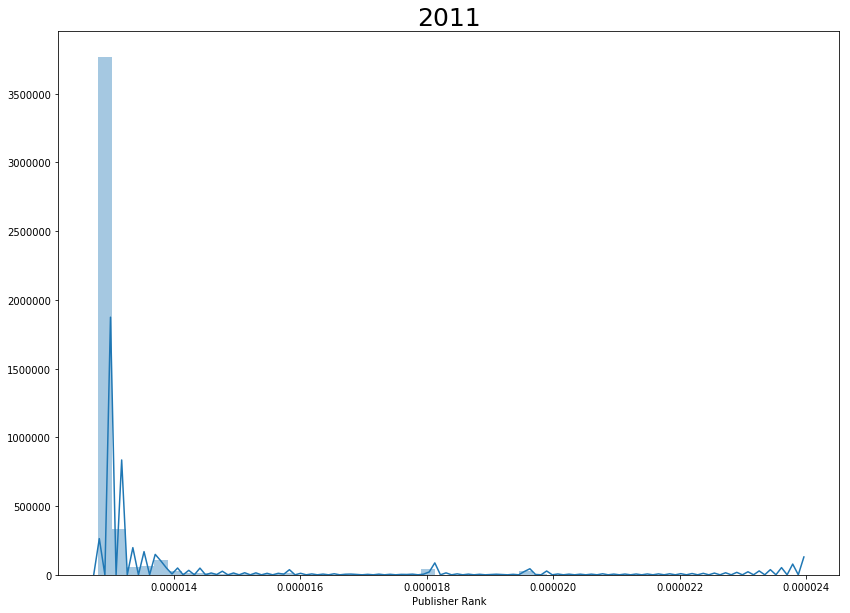

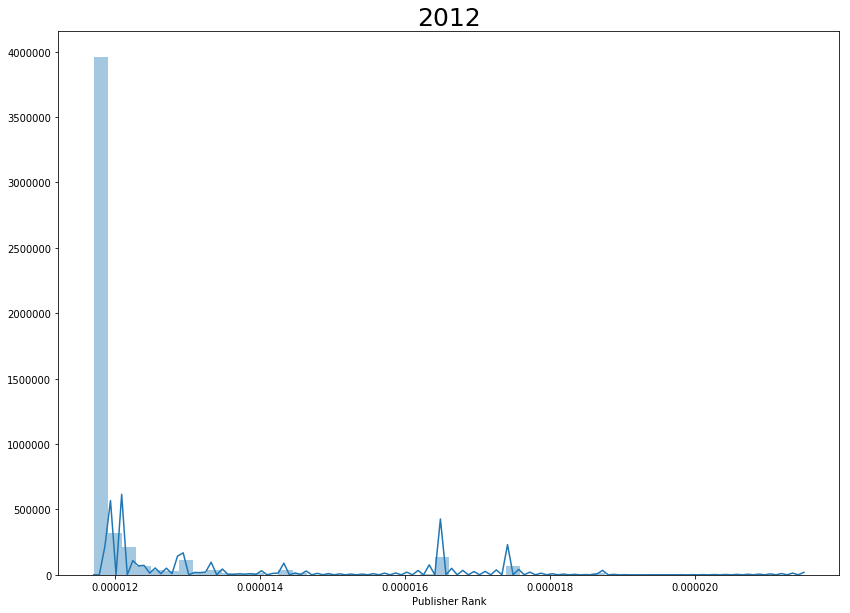

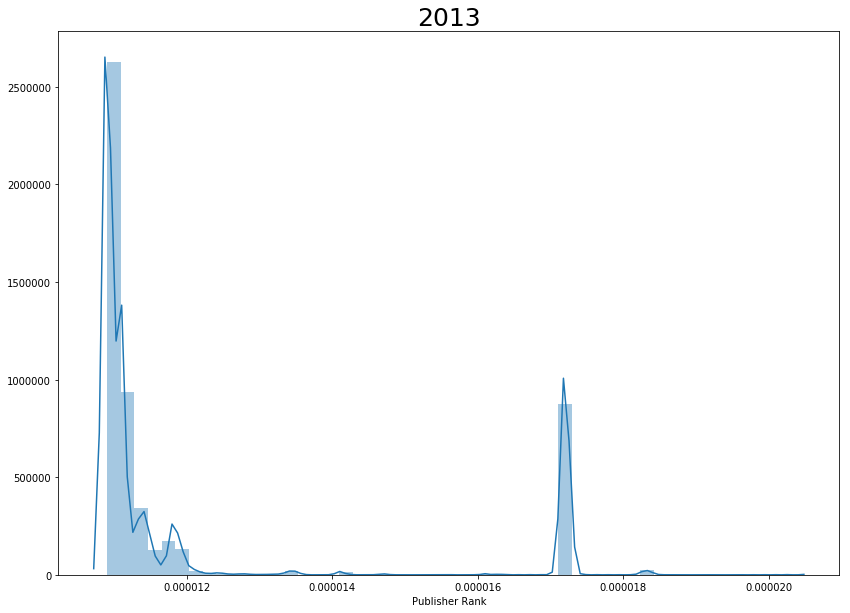

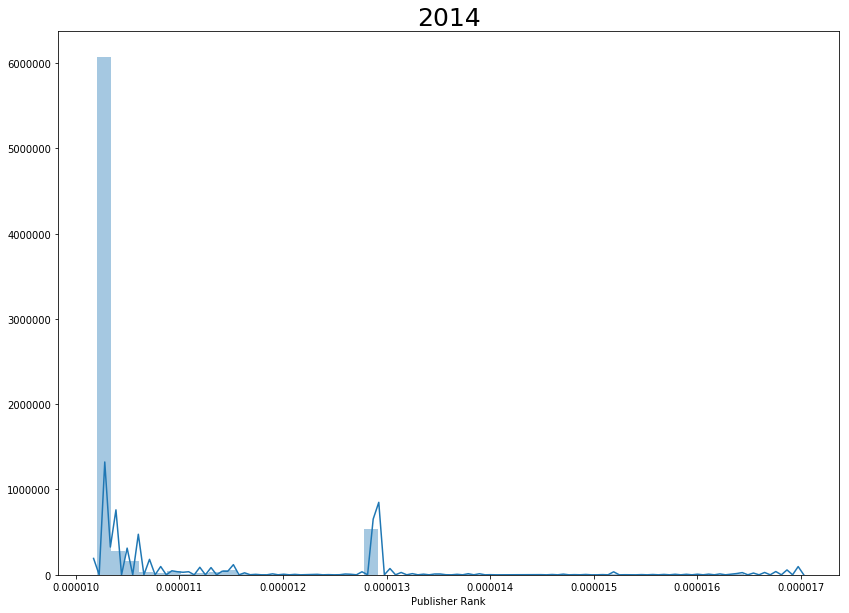

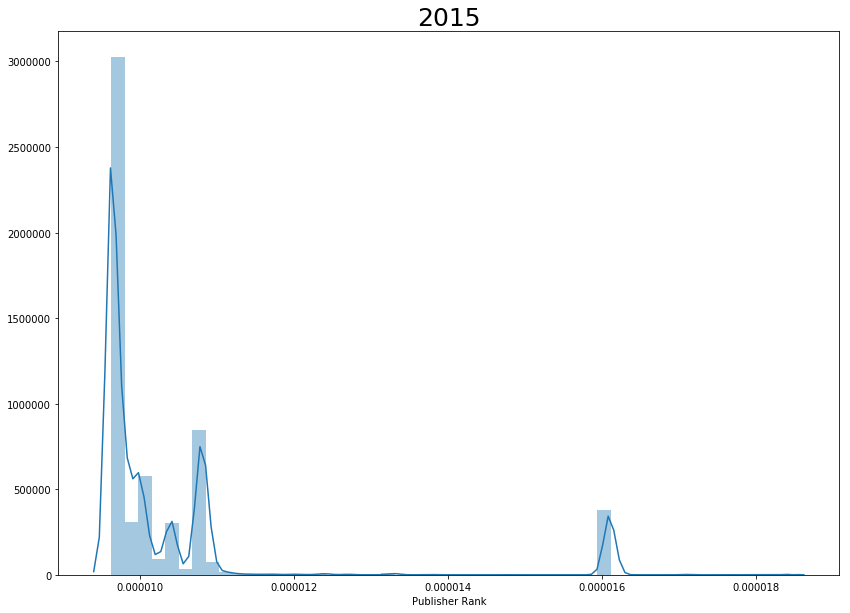

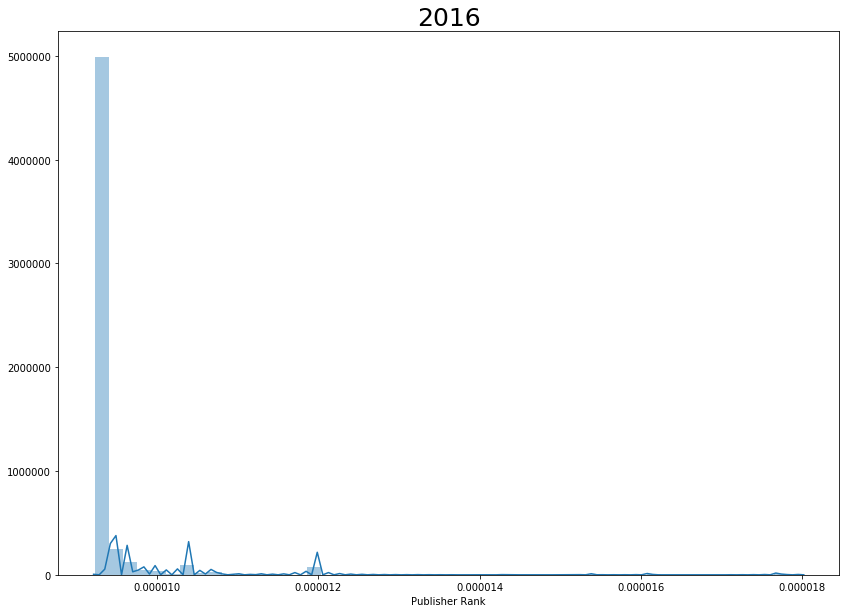

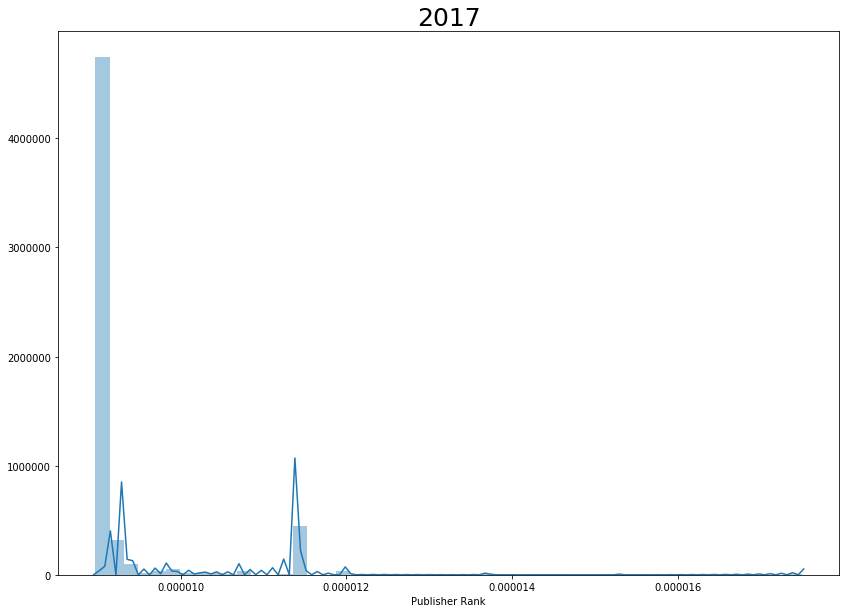

In [102]:
list1 = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i in range(len(list1)):
    Publisher_Rank_every_year = data.loc[data['Year Published'].isin([str(list1[i])])]
    Publisher_Rank_every_year = Publisher_Rank_every_year['Publisher Rank']
    fig, saxis = plt.subplots(1,1,figsize=(14,10))
    sns.distplot(Publisher_Rank_every_year,ax = saxis)
    saxis.set_title(str(list1[i]),fontsize=25) 

In [84]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df=data[(data['Year Published']==2000)]
df[['WOS Cited count','Areas Impact','Career Length','Author Rank','Publisher Rank']] = scaler.fit_transform(df[['WOS Cited count','Areas Impact','Career Length','Author Rank','Publisher Rank']])
df = df.groupby(['Coauthor','Year Published'],as_index=False).mean()
df['Score'] = 0.3*df['Career Length']+0.2*df['Author Rank']+0.2*df['Publisher Rank']+0.3*df['Areas Impact']+0.05*df['WOS Cited count']
df.loc[df.Score > df.Score.quantile(0.85), 'Label'] = '1'
df.loc[df.Score <= df.Score.quantile(0.85), 'Label'] = '0'
df['Label']=df['Label'].astype(int)

C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tangt\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [85]:
n = 2001
for item in data:
    if n != 2018:
        df1=data[(data['Year Published']==n)]
        df1[['WOS Cited count','Areas Impact','Career Length','Author Rank','Publisher Rank']] = scaler.fit_transform(df1[['WOS Cited count','Areas Impact','Career Length','Author Rank','Publisher Rank']])
        #df1 = df1.groupby(['Coauthor','Year Published'],as_index=False, sort=False).mean()
        df1 = df1.groupby(['Coauthor','Year Published'],as_index=False).mean()
        df1['Score'] = 0.3*df1['Career Length']+0.2*df1['Author Rank']+0.2*df1['Publisher Rank']+0.3*df1['Areas Impact']+0.05*df1['WOS Cited count']
        df1.loc[df1.Score > df1.Score.quantile(0.85), 'Label'] = '1' 
        df1.loc[df1.Score <= df1.Score.quantile(0.85), 'Label'] = '0'
        df1['Label']=df1['Label'].astype(int)
        n = n + 1
        df = pd.concat([df,df1])
    else:
        break

C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\tangt\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\tangt\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [86]:
df.head()

,Coauthor,Year Published,Language,Document Type,Author Country,Cited Reference Count,CR count,WOS Cited count,UC 180,UC since 2013,Page Count,Areas Impact,Keywords Impact,Career Length,Author Rank,Publisher Rank,Score,Label
0,"AIBA, S",2000,5.0,0.0,197.0,27.0,32.0,0.999936,1.0,8.0,6.0,0.011280,0.080164,0.000000,1.334398e-06,1.558522e-06,0.053382,0
1,"AWAMURA, N",2000,5.0,0.0,464.0,35.0,26.0,0.999873,0.0,10.0,13.0,0.015944,0.000882,0.000000,1.572877e-06,1.738241e-06,0.054778,0
2,"Ab Rashid, SR",2000,5.0,0.0,291.0,43.0,14.0,0.999663,0.0,4.0,8.0,0.025969,0.000441,0.000000,2.763353e-06,3.227483e-06,0.057775,0
3,"Abdelazeem, EA",2000,5.0,0.0,479.0,60.0,86.0,0.999717,1.0,19.0,6.0,0.003448,0.080227,0.023523,4.551654e-07,5.316144e-07,0.058077,0
4,"Abdelaziz, M",2000,5.0,7.0,473.0,0.0,0.0,0.000000,0.0,0.0,4.0,1.000000,0.085327,0.000000,9.479410e-05,1.271955e-04,0.300044,1


In [87]:
df.shape

(266659, 18)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266659 entries, 0 to 32006
Data columns (total 18 columns):
Coauthor                 266659 non-null object
Year Published           266659 non-null int64
Language                 266659 non-null float64
Document Type            266659 non-null float64
Author Country           266659 non-null float64
Cited Reference Count    266659 non-null float64
CR count                 266659 non-null float64
WOS Cited count          266659 non-null float64
UC 180                   266659 non-null float64
UC since 2013            266659 non-null float64
Page Count               266659 non-null float64
Areas Impact             266659 non-null float64
Keywords Impact          266659 non-null float64
Career Length            266659 non-null float64
Author Rank              266659 non-null float64
Publisher Rank           266659 non-null float64
Score                    266659 non-null float64
Label                    266659 non-null int32
dtypes: float

In [89]:
dataset = df

In [90]:
dataset.shape

(266659, 18)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266659 entries, 0 to 32006
Data columns (total 18 columns):
Coauthor                 266659 non-null object
Year Published           266659 non-null int64
Language                 266659 non-null float64
Document Type            266659 non-null float64
Author Country           266659 non-null float64
Cited Reference Count    266659 non-null float64
CR count                 266659 non-null float64
WOS Cited count          266659 non-null float64
UC 180                   266659 non-null float64
UC since 2013            266659 non-null float64
Page Count               266659 non-null float64
Areas Impact             266659 non-null float64
Keywords Impact          266659 non-null float64
Career Length            266659 non-null float64
Author Rank              266659 non-null float64
Publisher Rank           266659 non-null float64
Score                    266659 non-null float64
Label                    266659 non-null int32
dtypes: float

In [92]:
dataset = dataset.dropna(how='any',axis=0)

In [93]:
year = dataset['Year Published']<=2016
train = dataset[year]
test = dataset[~year]

In [94]:
print(len(train))
print(len(test))

234652
32007


In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test = dataset[year].ix[:,1:16],dataset[~year].ix[:,1:16],dataset[year].ix[:,17],dataset[~year].ix[:,17]
#model = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\tangt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, y_pred)
cm.print_stats()

population: 32007
P: 1600
N: 30407
PositiveTest: 1462
NegativeTest: 30545
TP: 1299
TN: 30244
FP: 163
FN: 301
TPR: 0.811875
TNR: 0.9946393922452067
PPV: 0.8885088919288646
NPV: 0.9901456866917663
FPR: 0.005360607754793304
FDR: 0.11149110807113544
FNR: 0.188125
ACC: 0.985503171181304
F1_score: 0.8484650555192684
MCC: 0.8418120713494706
informedness: 0.8065143922452067
markedness: 0.878654578620631
prevalence: 0.04998906489205486
LRP: 151.45204371165644
LRN: 0.1891388994511308
DOR: 800.7450828526588
FOR: 0.009854313308233753


In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.985503171181304

In [57]:
index_list = np.argsort(np.array(y_pred)==1)

In [58]:
top_author = index_list[0:10]

In [59]:
name = dataset['Coauthor'].index.isin(index_list)
dataset[['Coauthor','Score']][name].drop_duplicates().sort_values(by='Score', ascending=False).head(10)

,Coauthor,Score
7772,"Lahorte, P",0.418353
11209,"Parchi, P",0.418351
11702,"Poggetti, A",0.418351
9771,"Meucci, S",0.418351
10022,"Montali, M",0.418351
8569,"Lisanti, M",0.418351
11069,"Pacini, S",0.418351
4608,"Gill, RR",0.417416
3497,"Eastoe, J",0.417262
12760,"Sagisaka, M",0.417262


In [60]:
# Decison Tree
from sklearn.neural_network import MLPClassifier
#from sklearn import tree
x_train,x_test,y_train,y_test = dataset[year].ix[:,1:16],dataset[~year].ix[:,1:16],dataset[year].ix[:,17],dataset[~year].ix[:,17]
model = MLPClassifier()
#model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [61]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, y_pred)
cm.print_stats()

population: 32007
P: 4801
N: 27206
PositiveTest: 12716
NegativeTest: 19291
TP: 4349
TN: 18839
FP: 8367
FN: 452
TPR: 0.9058529473026453
TNR: 0.6924575461295303
PPV: 0.342010066058509
NPV: 0.9765693846871598
FPR: 0.30754245387046975
FDR: 0.6579899339414911
FNR: 0.09414705269735472
ACC: 0.7244665229481051
F1_score: 0.4965462122509562
MCC: 0.4365883969747622
informedness: 0.5983104934321757
markedness: 0.31857945074566874
prevalence: 0.14999843784172212
LRP: 2.945456589496327
LRN: 0.13596075777293024
DOR: 21.664020102150143
FOR: 0.023430615312840186


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     27206
           1       0.34      0.91      0.50      4801

   micro avg       0.72      0.72      0.72     32007
   macro avg       0.66      0.80      0.65     32007
weighted avg       0.88      0.72      0.76     32007



In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7244665229481051

In [64]:
index_list = np.argsort(np.array(y_pred))

In [65]:
name = dataset['Coauthor'].index.isin(index_list)
dataset[['Coauthor','Score']][name].sort_values(by='Score', ascending=False).drop_duplicates().head(10)

,Coauthor,Score
7772,"Lahorte, P",0.418353
11209,"Parchi, P",0.418351
11702,"Poggetti, A",0.418351
9771,"Meucci, S",0.418351
10022,"Montali, M",0.418351
8569,"Lisanti, M",0.418351
11069,"Pacini, S",0.418351
4608,"Gill, RR",0.417416
3497,"Eastoe, J",0.417262
12760,"Sagisaka, M",0.417262


In [66]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test = dataset[year].ix[:,1:16],dataset[~year].ix[:,1:16],dataset[year].ix[:,17],dataset[~year].ix[:,17]
model = XGBClassifier()
eval_set = [(x_test, y_test)]
#model = RandomForestClassifier(n_estimators=5)
#model = AdaBoostClassifier(n_estimators=100)
model.fit(x_train,y_train,early_stopping_rounds=10,eval_metric=['logloss', 'auc'], eval_set=eval_set, verbose=True)
y_pred = model.predict(x_test)

C:\Users\tangt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


[0]	validation_0-logloss:0.639901	validation_0-auc:0.89896
Multiple eval metrics have been passed: 'validation_0-auc' will be used for early stopping.

Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.59387	validation_0-auc:0.903744
[2]	validation_0-logloss:0.551497	validation_0-auc:0.931925
[3]	validation_0-logloss:0.515607	validation_0-auc:0.945752
[4]	validation_0-logloss:0.486791	validation_0-auc:0.943695
[5]	validation_0-logloss:0.462964	validation_0-auc:0.947751
[6]	validation_0-logloss:0.442311	validation_0-auc:0.948541
[7]	validation_0-logloss:0.424085	validation_0-auc:0.95031
[8]	validation_0-logloss:0.405072	validation_0-auc:0.951496
[9]	validation_0-logloss:0.398869	validation_0-auc:0.952456
[10]	validation_0-logloss:0.388907	validation_0-auc:0.957433
[11]	validation_0-logloss:0.379318	validation_0-auc:0.958166
[12]	validation_0-logloss:0.376585	validation_0-auc:0.956354
[13]	validation_0-logloss:0.368551	validation_0-auc:0.961291
[1

In [67]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, y_pred)
cm.print_stats()

population: 32007
P: 4801
N: 27206
PositiveTest: 8957
NegativeTest: 23050
TP: 4630
TN: 22879
FP: 4327
FN: 171
TPR: 0.9643824203290982
TNR: 0.8409542012791296
PPV: 0.5169141453611701
NPV: 0.9925813449023861
FPR: 0.1590457987208704
FDR: 0.48308585463882997
FNR: 0.03561757967090189
ACC: 0.8594682413222108
F1_score: 0.6730629451955226
MCC: 0.6405586443515379
informedness: 0.8053366216082276
markedness: 0.5094954902635562
prevalence: 0.14999843784172212
LRP: 6.063551681875073
LRN: 0.04235376863178272
DOR: 143.16439546597795
FOR: 0.007418655097613883


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     27206
           1       0.52      0.96      0.67      4801

   micro avg       0.86      0.86      0.86     32007
   macro avg       0.75      0.90      0.79     32007
weighted avg       0.92      0.86      0.87     32007



In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8594682413222108

In [699]:
index_list = np.argsort(-np.array(y_pred))

In [700]:
name = dataset['Coauthor'].index.isin(index_list)
dataset[['Coauthor','Score']][name].sort_values(by='Score', ascending=False).drop_duplicates().head(10)

,Coauthor,Score
7933,"Lahorte, P",0.418353
10219,"Montali, M",0.418351
11930,"Poggetti, A",0.418351
11283,"Pacini, S",0.418351
11427,"Parchi, P",0.418351
9965,"Meucci, S",0.418351
8736,"Lisanti, M",0.418351
4713,"Gill, RR",0.417416
3568,"Eastoe, J",0.417262
13021,"Sagisaka, M",0.417262
